# Problem Set 7

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from scipy.optimize import minimize


# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid
import plotting as plot

%load_ext autoreload
%autoreload 2

# Problem 1

\begin{align*}
f(t,T) &= f_\infty + \sum_{k=0}a_k (T-t)^k e^{-b_k (T-t)}, \qquad b_j >0 \\
&= f_\infty + a_0 e^{-b_0 (T-t)} + a_1 (T-t) e^{-b_1 (T-t)} + a_2 (T-t)^2 e^{-b_2 (T-t)} + a_3 (T-t)^3 e^{-b_3 (T-t)} + \dots \\
\end{align*}

Tend to f-infinity as $T \to \infty$ as the sum reduces in time.

Vasicek and CIR has only 3 parameters giving (possibly) horrible fit to the data. This model has is more flexible.
Downside w. Nelson-Siegel. It is more differentiable to upper case T and flexible but is more restrictive in the functional form.

# Problem 2

In this problem, we will consider the Ho-Lee model in which the short rate under the risk neutral measure $\mathbb{Q}$ has dynamics

\begin{align*}
dr_t = \theta_t dt + \sigma dW_t
\end{align*}

Our objective will be to fit the Ho-Lee model to observed forward rates extracted from the market. So, assume that we observe the forward rates given in the vector f star in the file `homework 7.py` for the maturities in the vector $T$ from that same file and denote these observed forward rates by $f^*$. Also assume that $\sigma = 0.03$. To estimate $\theta(t)$ in the Ho-Lee model, we will fit a Nelson-Siegel type function $f(t,T)$ to the observed prices $f^*$

\begin{align*}
f(t,T) = f_\infty + \sum_{k=0}^K a_k (T-t)^k e^{-b_k (T-t)}
\end{align*}

Where $f_\infty$ is the long term forward rate, $b_k>0$ and $K$ governs the number of $a_i$ and $b_i$ factors that are to be estimated in the model. 

#### (a) Set present time to $t = 0$ and plot the forward rates, spot rates and zero coupon bond rates generated by the function $f(T) = f(t = 0,T)$ for all maturities in the $T = [0,0.1,...,9.9,10]$ and parameters $[f_\infty,a_0,a_1,b_0,b_1] = [0.05,−0.02,0.01,0.5,0.4]$. Explain the role each parameter plays in the shape of the spot and forward rate curves

In [2]:
f_star = np.array([0.02, 0.02200177, 0.02399526, 0.02596512, 0.02789877,
0.02978607, 0.03161897, 0.03339121, 0.03509809, 0.03673622, 0.03830334,
0.03979815, 0.04122013, 0.04256945, 0.04384681, 0.04505338, 0.04619068,
0.04726055, 0.04826501, 0.04920630, 0.05008674, 0.05090877, 0.05167487,
0.05238751, 0.05304920, 0.05366240, 0.05422954, 0.05475300, 0.05523509,
0.05567805, 0.05608405, 0.05645518, 0.05679343, 0.05710072, 0.05737887,
0.05762962, 0.05785464, 0.05805548, 0.05823363, 0.05839051, 0.05852743,
0.05864565, 0.05874636, 0.05883067, 0.05889961, 0.05895418, 0.05899529,
0.05902381, 0.05904056, 0.05904630, 0.05904173, 0.05902752, 0.05900431,
0.05897268, 0.05893317, 0.05888630, 0.05883255, 0.05877236, 0.05870616,
0.05863434, 0.05855727, 0.05847529, 0.05838872, 0.05829788, 0.05820303,
0.05810446, 0.05800240, 0.05789709, 0.05778876, 0.05767760, 0.05756382,
0.05744759, 0.05732909, 0.05720849, 0.05708593, 0.05696156, 0.05683551,
0.05670793, 0.05657892, 0.05644861, 0.05631711, 0.05618451, 0.05605093,
0.05591645, 0.05578117, 0.05564517, 0.05550853, 0.05537132, 0.05523364,
0.05509554, 0.05495709, 0.05481836, 0.05467941, 0.05454029, 0.05440108,
0.05426181, 0.05412255, 0.05398334, 0.05384423, 0.05370527, 0.05356650])

In [3]:
N = 100 # number of months
T = np.array([1/10*i for i in range(0,N+1)]) # time to maturity in years (10 points per year)

# parameters outlined in the exercise
f_inf, sigma = 0.05, 0.03
a_star, b_star = [-0.02, 0.01], [0.5, 0.4] # must be in form of lists/tuples/arrays

# parameters for 2a in his file
f_inf, sigma = 0.05, 0.03
a_star, b_star = [-0.02, 0.01], [0.55, 0.4] # only difference is b_star where 0.5 is replaced by 0.55

param = f_inf, a_star, b_star

In [4]:
f_plot = fid.f_ns(param, T) # forward rates
p_plot = np.exp(-fid.F_ns(param, T)) 
R_plot = fid.spot_rates_from_zcb_prices(T, p_plot)

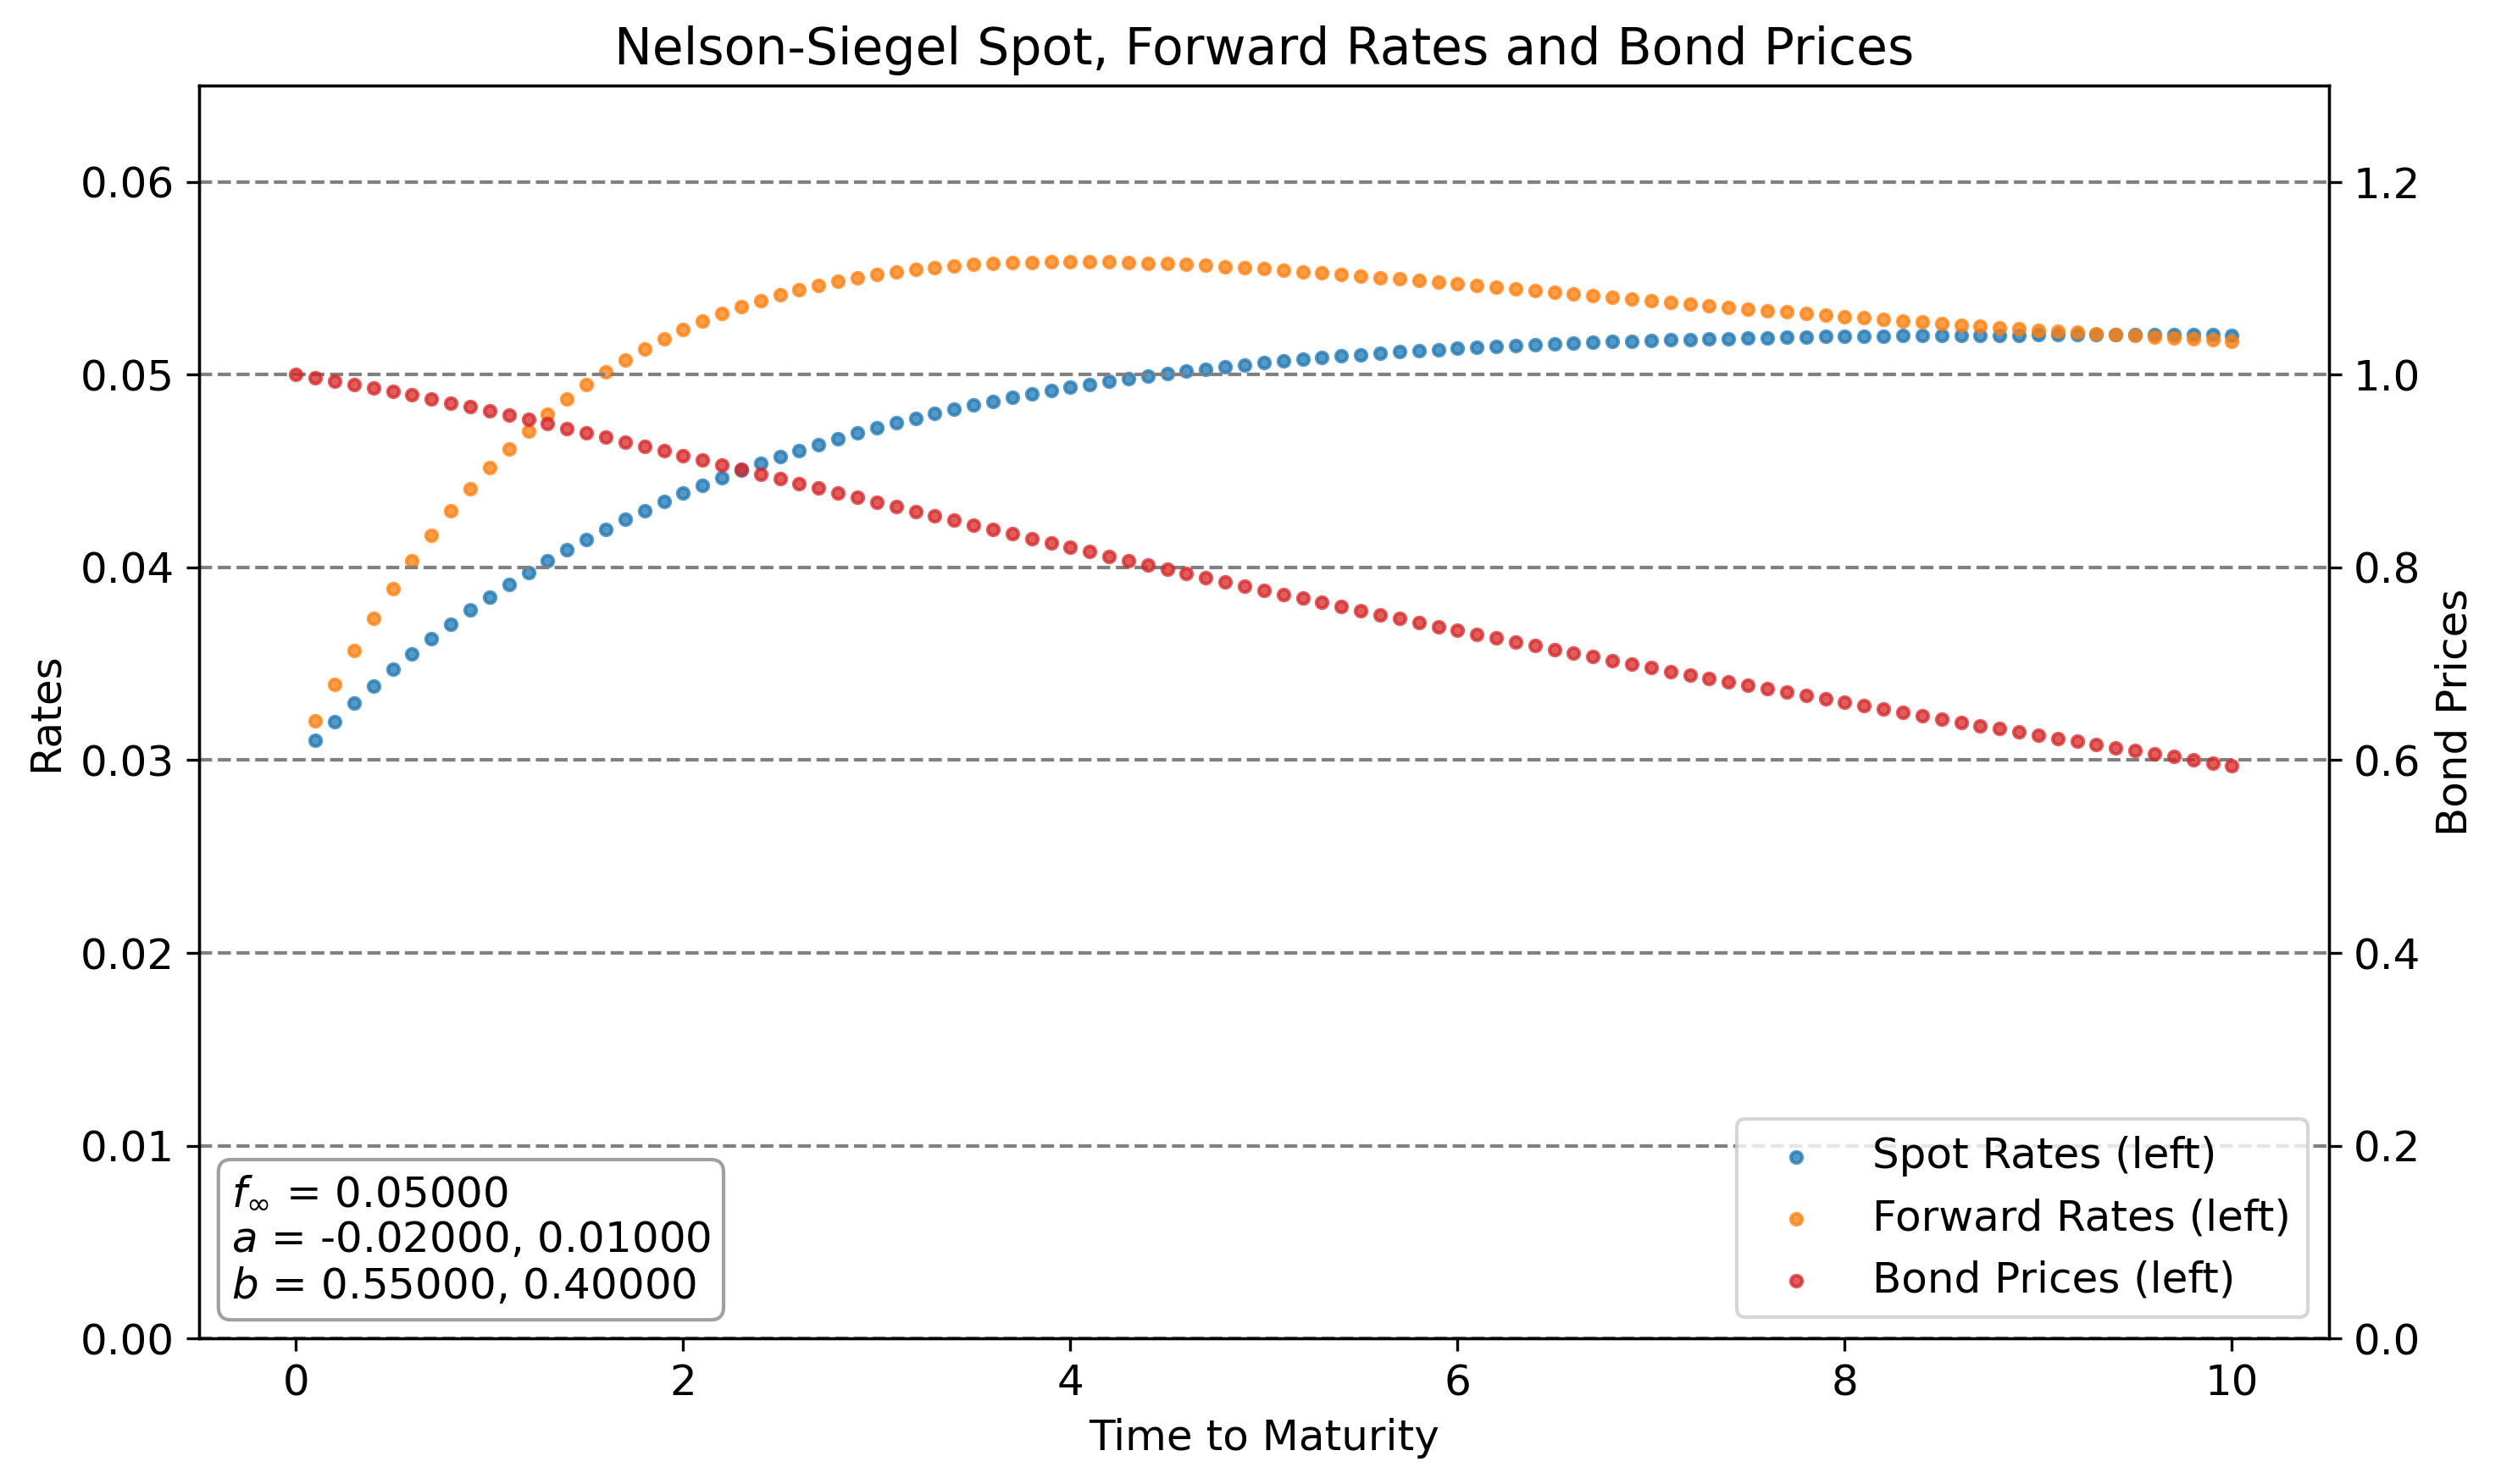

In [5]:
left_axis = [{'label':'Spot Rates','x':T[1:], 'y':R_plot[1:],'s':40},
             {'label':'Forward Rates','x':T[1:], 'y':f_plot[1:],'s':40}]
right_axis = [{'label':'Bond Prices','x':T, 'y':p_plot,'s':40}]
text = {'$f_\infty$':f_inf, '$a$':a_star, '$b$':b_star}

plot.rates(left_axis, right_axis, 'Nelson-Siegel Spot, Forward Rates and Bond Prices', text)

Certainly $K=3$ and $K=2$ both produce fine results when fitting while $K=1$ is not fitting well enough

#### (b) Plot the observed forward rates $f^*(T)$ in a separate plot and try to guess how many terms $K$ will at least need to be included in the fit. Also, based on the plot come up with a set of plausible parameter values so that $f(T)$ with your choice of parameters is likely to fit $f^*(T)$ for $K = 1$.

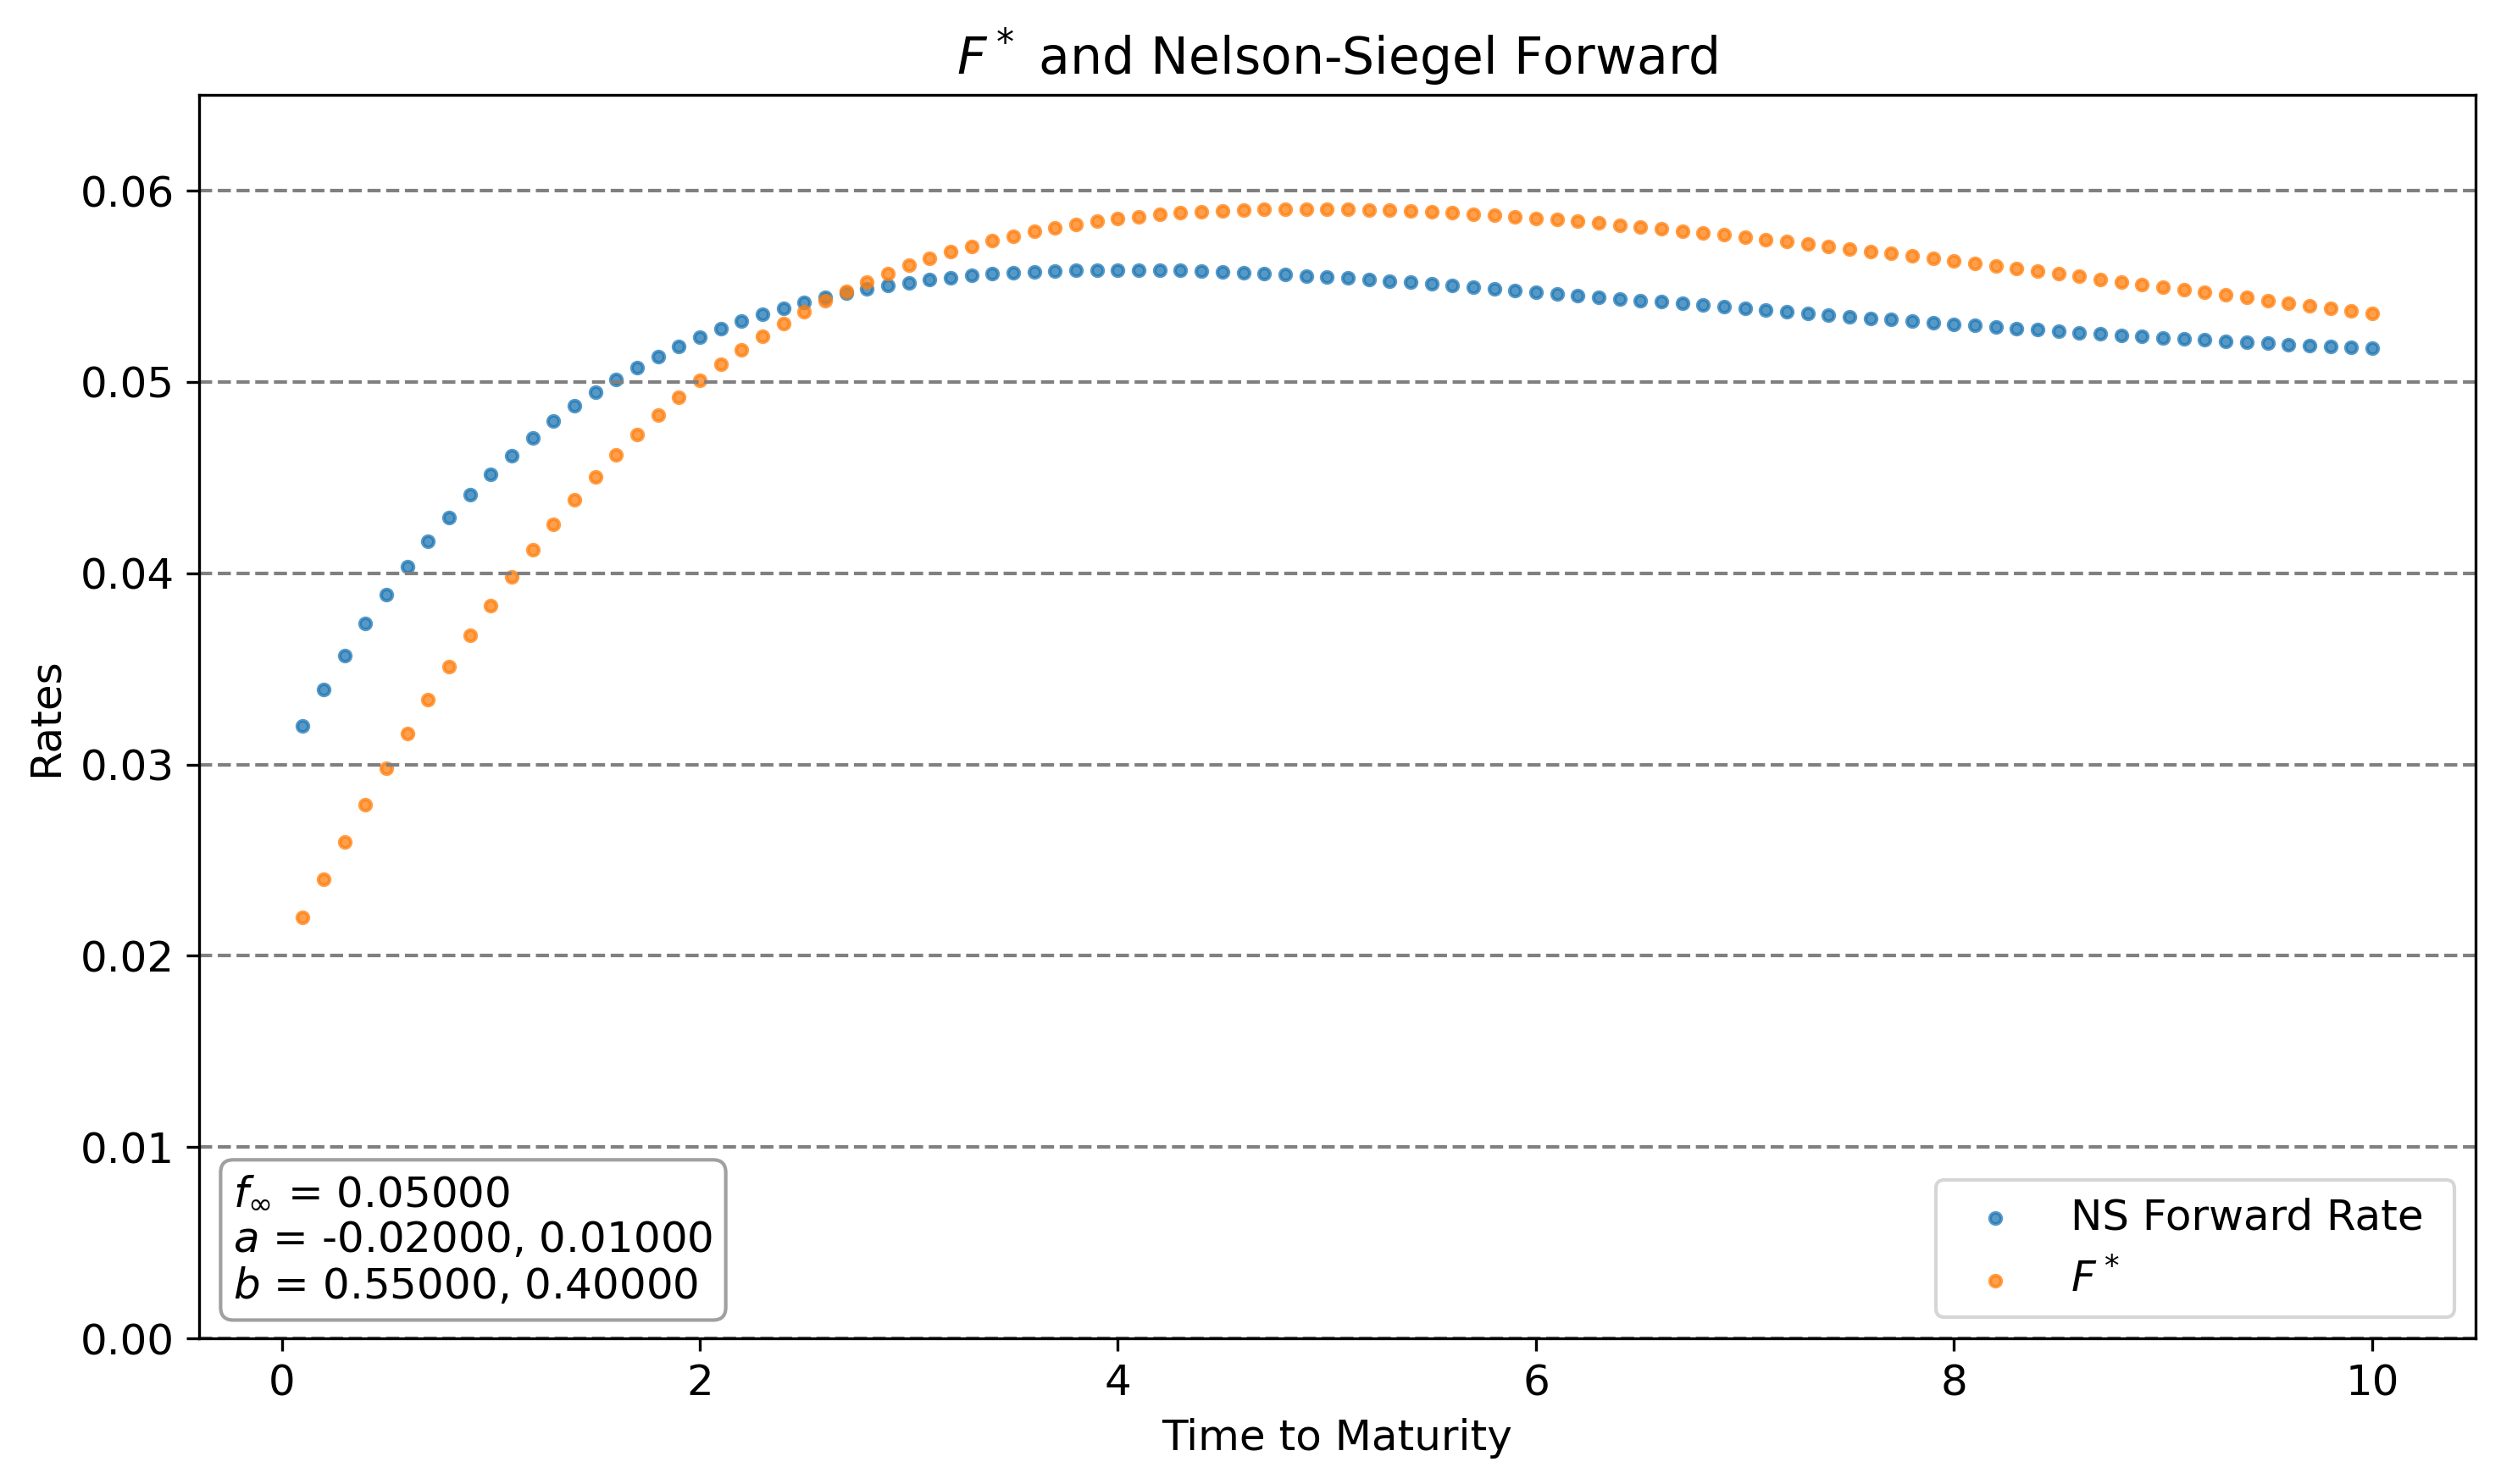

In [6]:
left_axis = [{'label':'NS Forward Rate','x':T[1:], 'y':f_plot[1:],'s':40},
                {'label':'$F^*$','x':T[1:], 'y':f_star[1:],'s':40}]
text = {'$f_\infty$':f_inf, '$a$':a_star, '$b$':b_star}

plot.rates(left_axis, title='$F^*$ and Nelson-Siegel Forward', text=text)

#### (c) Fit the function $f(T)$ to the observed values in $f^*(T)$ using `scipy.optimize` and the `nelder-mead` method. Your objective function should compute the total squared error between the fitted and observed values and hence, you should solve the following minimization problem $$ \min_{f_\infty,a^*,b^*} \sum_{i=1}^N (f^*(T_i) - f(T_i))^2 $$ Do your fit recursively for increasing values of $K$ starting with $K = 1$ and try to go up to no more than $K = 4$. Plot the fitted values $\hat{f}(T)$ versus the observed values $f^*(T)$ for the best fit you achieve.

In [7]:
# define the objective function
def forward_obj_ns(params, f_star, T): # nelson siegel
    N = int((len(params)-1)/2-1)
    f_inf, a, b = params[0], params[1:1+N+1], params[N+2:N+2+N+1]
    param_fit = f_inf, a, b
    # print(param_fit)
    M = len(T)
    f_fit = fid.f_ns(param_fit, T)
    y = 0
    for i in range(M):
        y += (f_fit[i] - f_star[i])**2
    return y

In [8]:
# for K=1
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,#0.03,0.01 # must be in form of tuple/list/array
b_0 = 0.35,#0.35,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

# unconstrained optimization
result1 = minimize(forward_obj_ns, param_0, args=(f_star, T), method='nelder-mead', options={'disp': False})
f_inf_hat1, a_hat1, b_hat1, sse1 = result1.x[0], result1.x[1:1+K+1], result1.x[K+2:K+2+K+1], result1.fun
print(f'results:\n',
      f'f_inf: {f_inf_hat1}\n',
      f'a: {a_hat1}\n',
      f'b: {b_hat1}')
f_fit1 = fid.f_ns((f_inf_hat1, a_hat1, b_hat1), T)
res1 = f_star - f_fit1

results:
 f_inf: 0.0575495106100254
 a: [-0.04114241]
 b: [0.86656465]


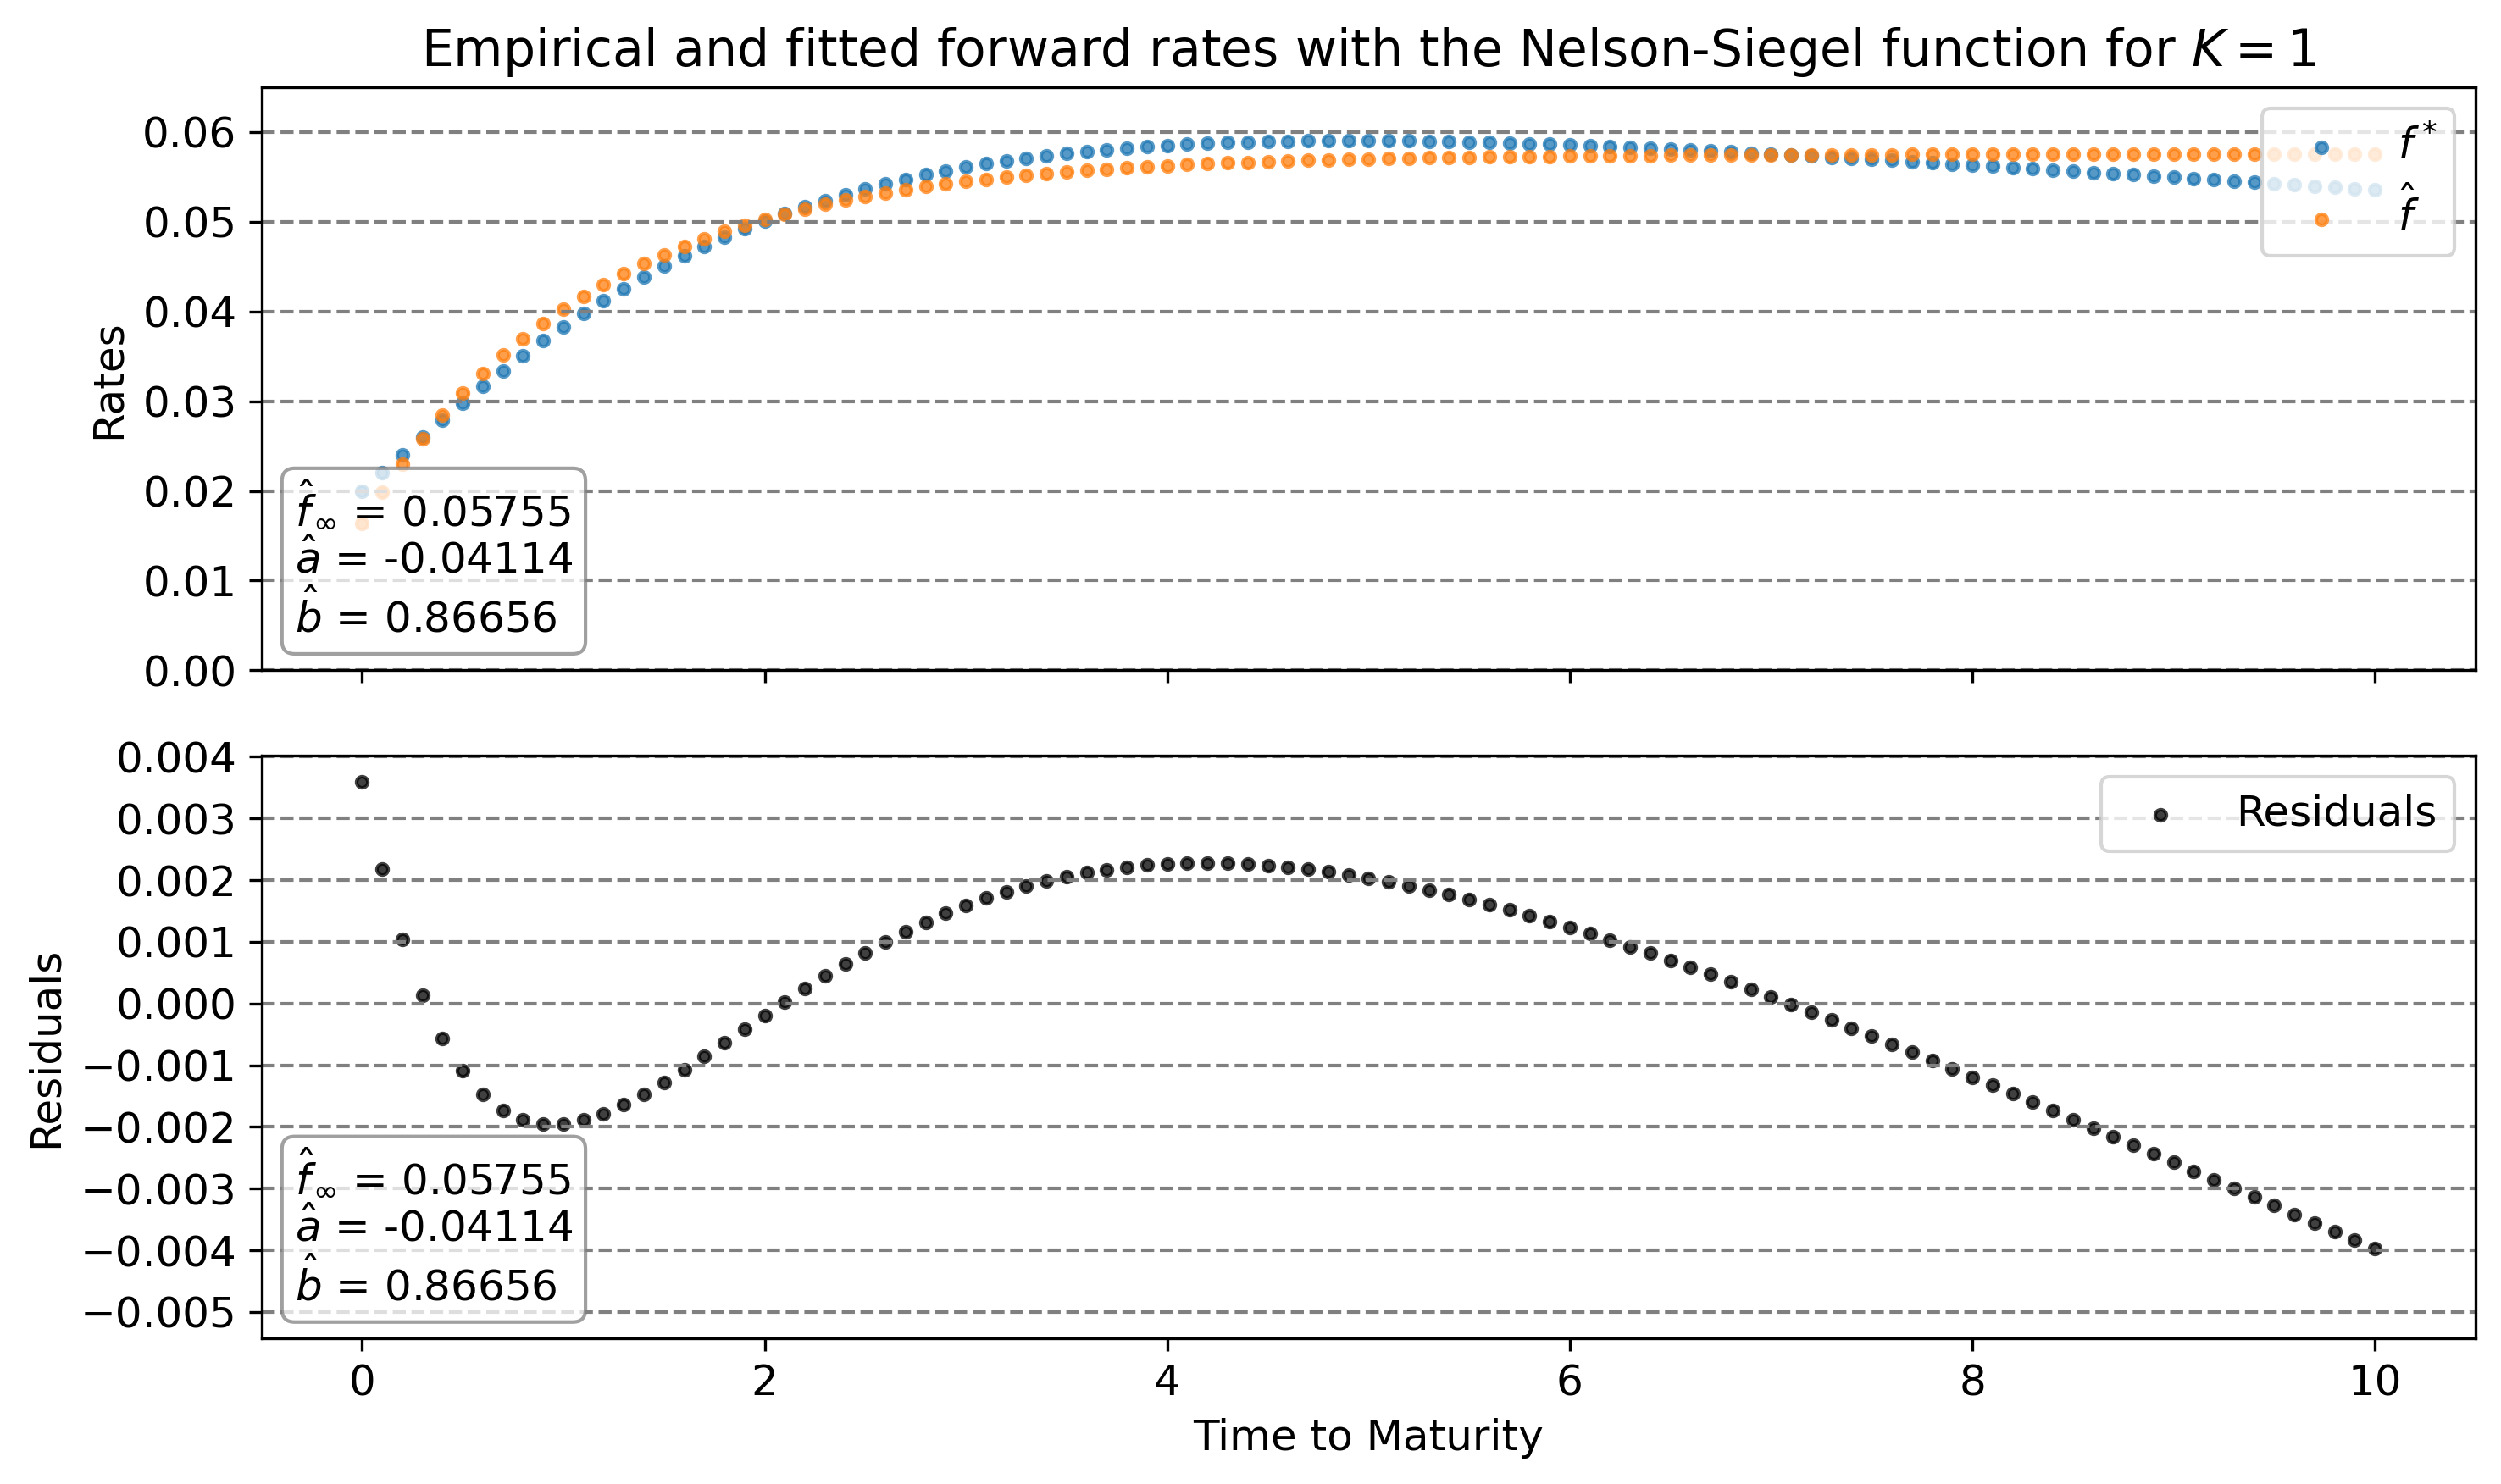

In [9]:
fit_data = [{'label':'$f^*$','x':T, 'y':f_star,'s':40},
            {'label':'$\hat{f}$','x':T, 'y':f_fit1,'s':40}]
residuals = [{'label':'Residuals','x':T, 'y':res1,'s':40}]
text = {'$\hat f_\infty$':f_inf_hat1, '$\hat a$':a_hat1, '$\hat b$':b_hat1}
text_res = {'SSE':sse1}

plot.fit(fit_data, residuals, f'Empirical and fitted forward rates with the Nelson-Siegel function for $K = {K+1}$', text, text_res, text_loc='lower left')


In [10]:
# for K=2
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,0.03#,0.01 # must be in form of tuple/list/array
b_0 = 0.35,0.35#,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

# unconstrained optimization
result2 = minimize(forward_obj_ns, param_0, args=(f_star, T), method='nelder-mead', options={'disp': False})
f_inf_hat2, a_hat2, b_hat2, sse2 = result2.x[0], result2.x[1:1+K+1], result2.x[K+2:K+2+K+1], result2.fun
print(f'results:\n',
      f'f_inf: {f_inf_hat2}\n',
      f'a: {a_hat2}\n',
      f'b: {b_hat2}')
f_fit2 = fid.f_ns((f_inf_hat2, a_hat2, b_hat2), T)
res2 = f_star - f_fit2

results:
 f_inf: 0.04676151292122524
 a: [-0.02771372  0.01628986]
 b: [0.31856013 0.30158209]


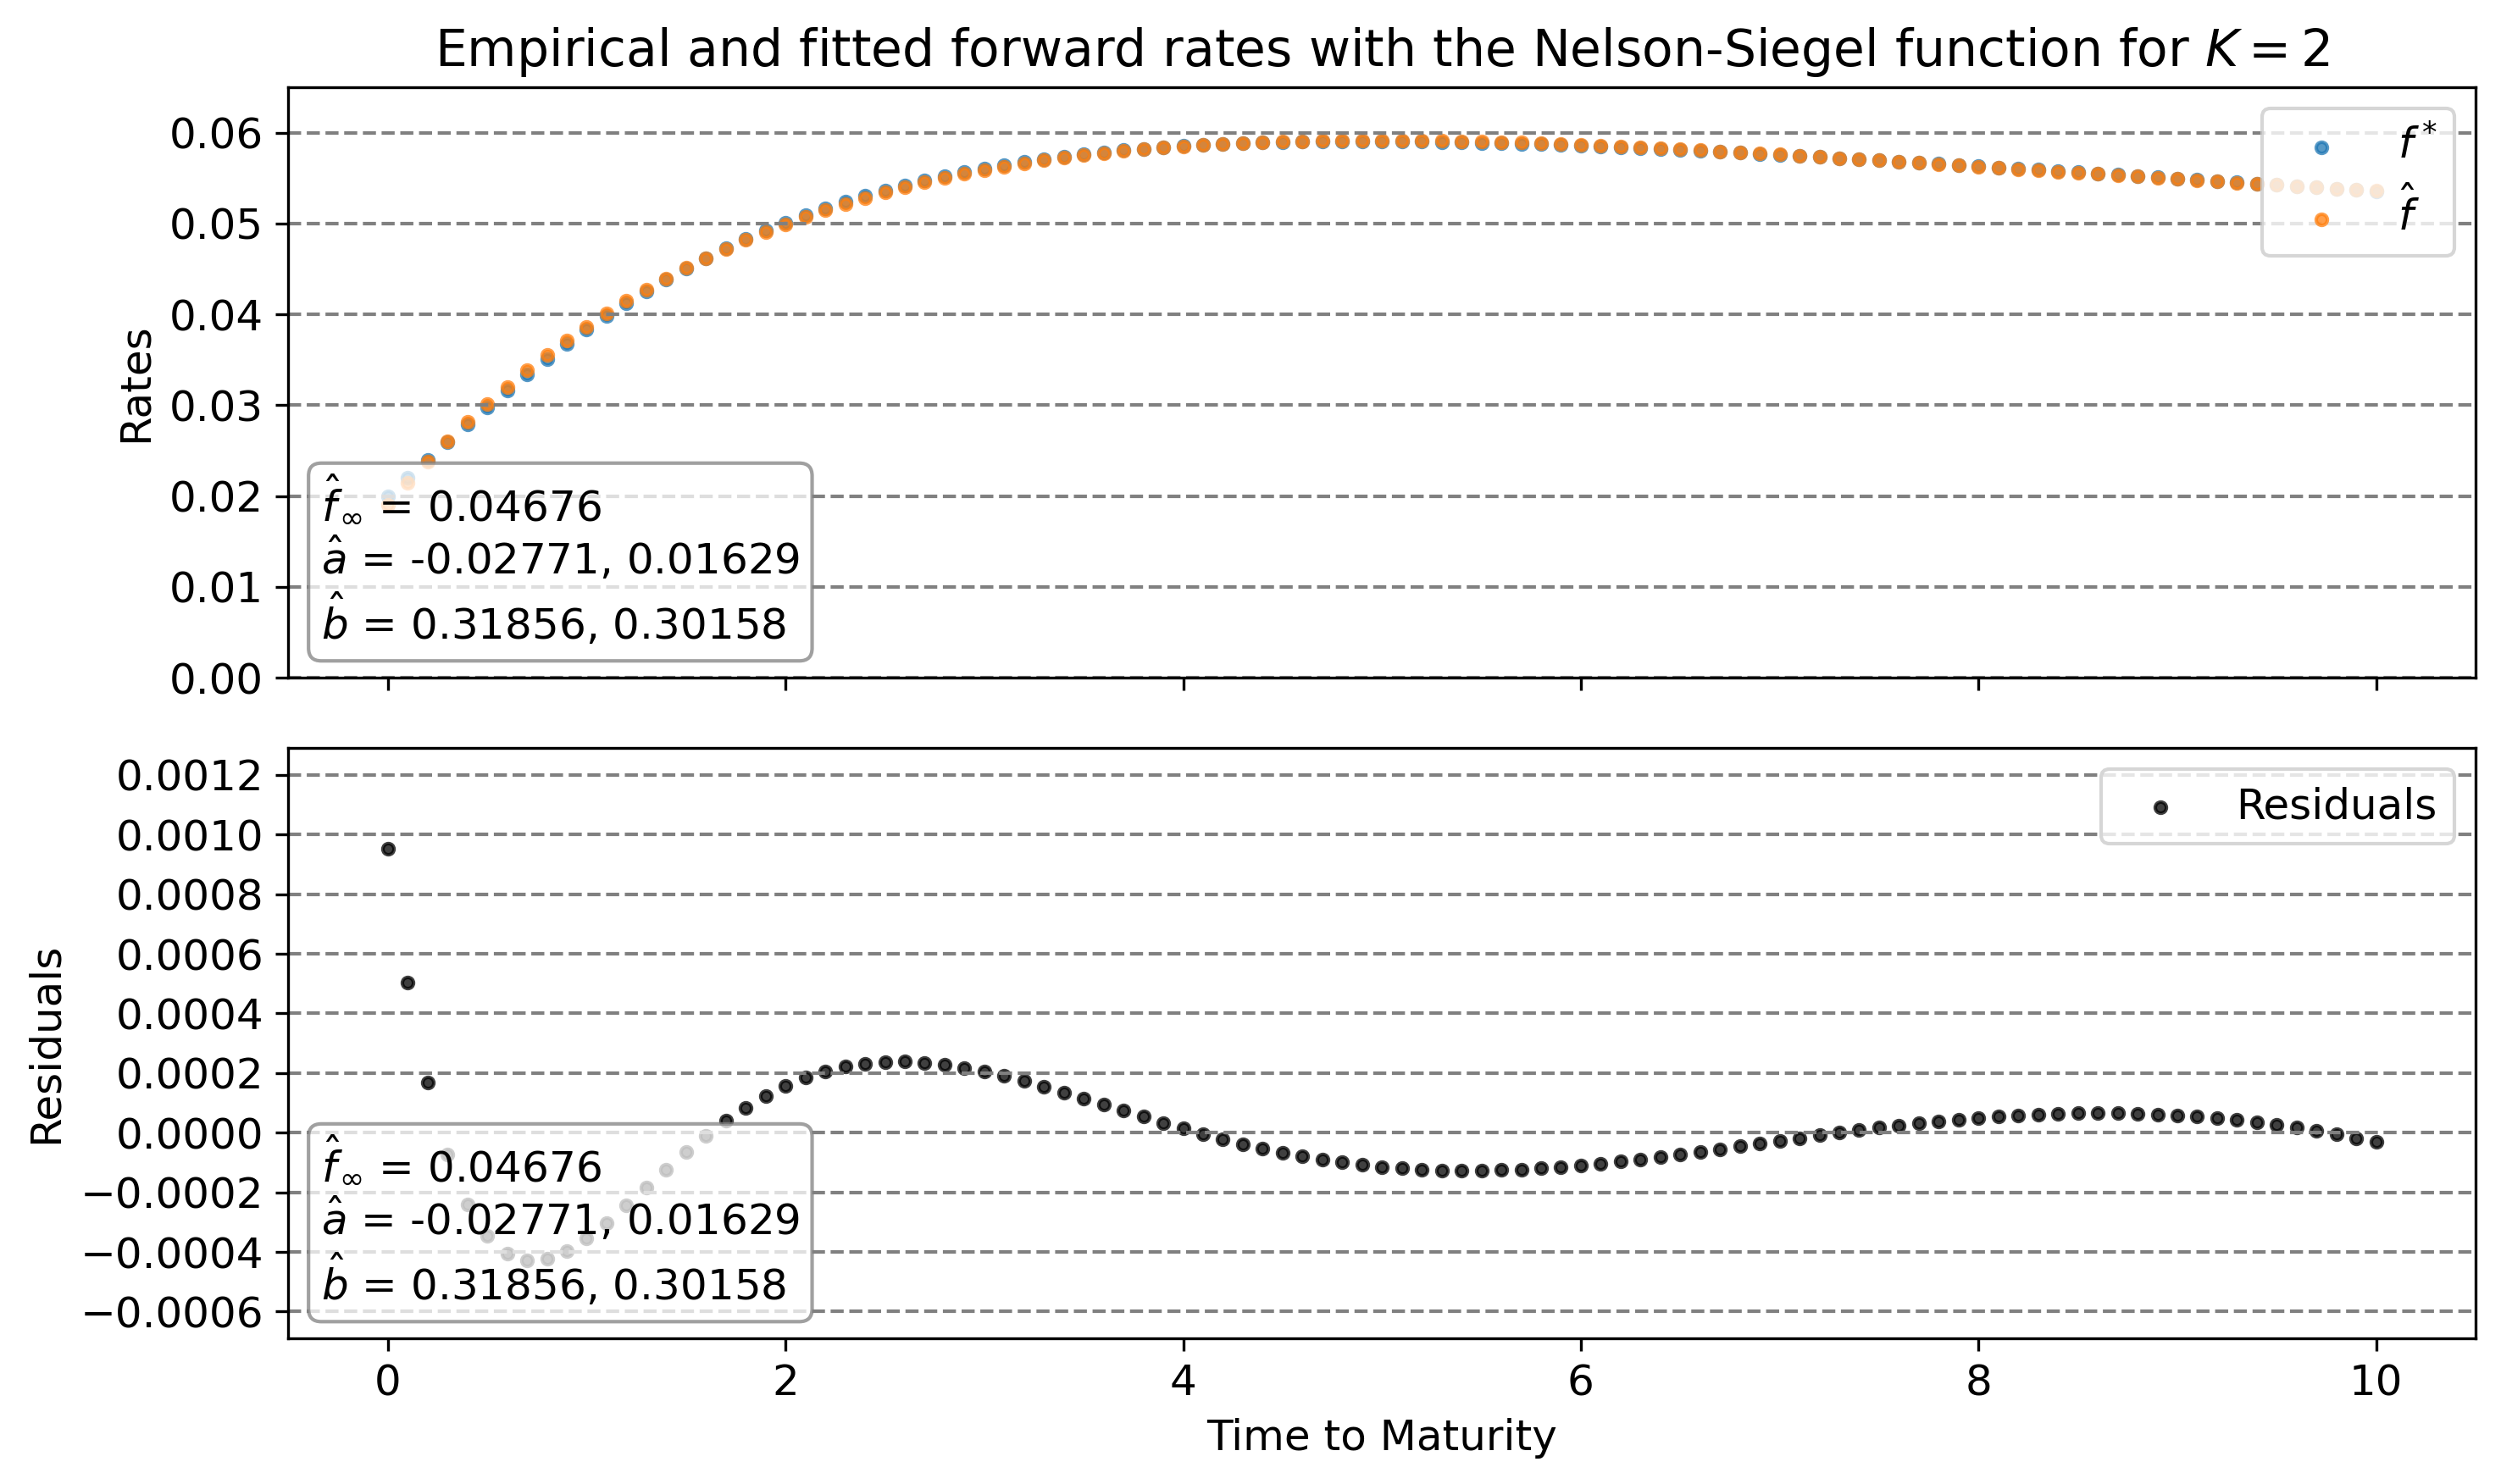

In [11]:
fit_data = [{'label':'$f^*$','x':T, 'y':f_star,'s':40},
            {'label':'$\hat{f}$','x':T, 'y':f_fit2,'s':40}]
residuals = [{'label':'Residuals','x':T, 'y':res2,'s':40}]
text = {'$\hat f_\infty$':f_inf_hat2, '$\hat a$':a_hat2, '$\hat b$':b_hat2}
text_res = {'SSE':sse2}

plot.fit(fit_data, residuals, f'Empirical and fitted forward rates with the Nelson-Siegel function for $K = {K+1}$', text, text_res, text_loc='lower left')

In [12]:
# for K=3
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,0.03,0.001 # he uses 0.001 in his file instead of the stated 0.01, does make a difference for the results and propagate through the rest of the file
b_0 = 0.35,0.35,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

# unconstrained optimization
result3 = minimize(forward_obj_ns, param_0, args=(f_star, T), method='nelder-mead', options={'disp': False})
f_inf_hat3, a_hat3, b_hat3, sse3 = result3.x[0], result3.x[1:1+K+1], result3.x[K+2:K+2+K+1], result3.fun
print(f'results:\n',
      f'f_inf: {f_inf_hat3}\n',
      f'a: {a_hat3}\n',
      f'b: {b_hat3}')
f_fit3 = fid.f_ns((f_inf_hat3, a_hat3, b_hat3), T)
res3 = f_star - f_fit3

results:
 f_inf: 0.04628685470353083
 a: [-0.02647593  0.0104491   0.0029229 ]
 b: [0.42107077 0.26135415 0.73138039]


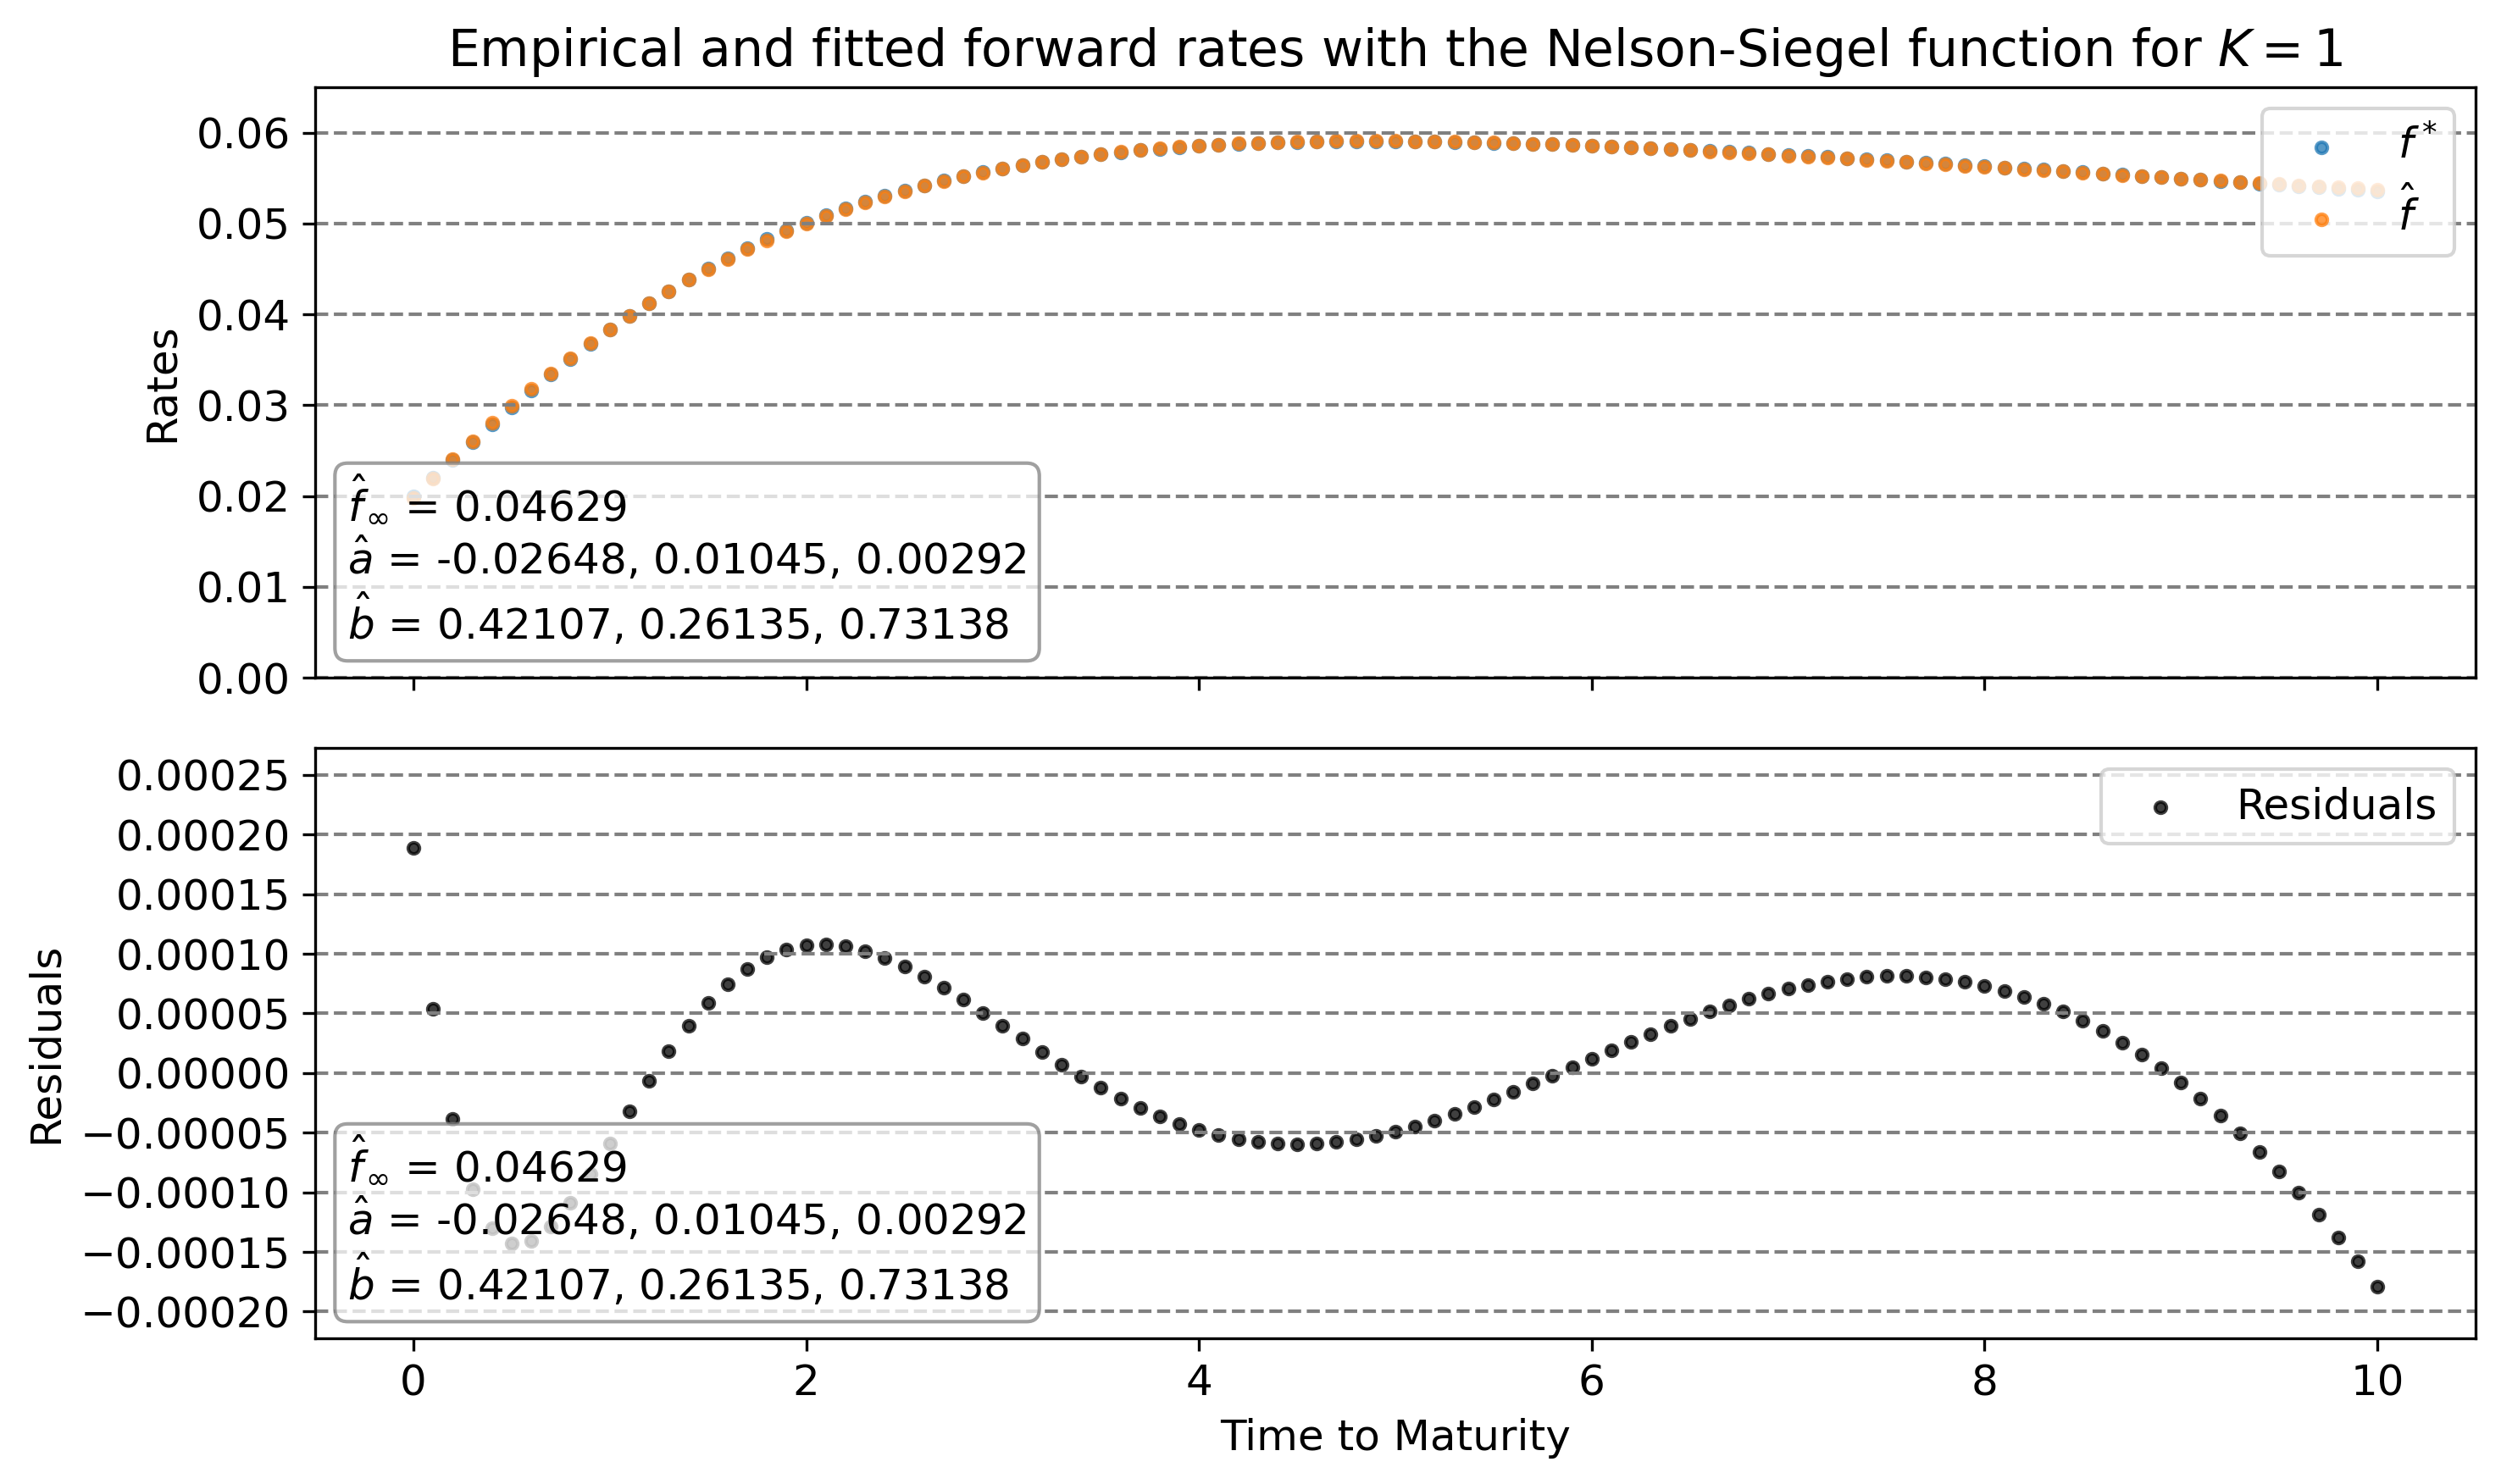

In [13]:
fit_data = [{'label':'$f^*$','x':T, 'y':f_star,'s':40},
            {'label':'$\hat{f}$','x':T, 'y':f_fit3,'s':40}]
residuals = [{'label':'Residuals','x':T, 'y':res3,'s':40}]
text = {'$\hat f_\infty$':f_inf_hat3, '$\hat a$':a_hat3, '$\hat b$':b_hat3}
text_res = {'SSE':sse3}

plot.fit(fit_data, residuals, 'Empirical and fitted forward rates with the Nelson-Siegel function for $K = 1$', text, text_res, text_loc='lower left')


#### (d) Given your choice of $K$ and preferred parameter estimates, find the function $\Theta(t)$ in the drift of the Ho-Lee model using that $$ \Theta(t) = \frac{\partial f^*(0,t)}{\partial T} + \sigma^2 t $$ where $\frac{\partial f^*(0,t)}{\partial T}$ is the derivative in the second argument of $f^*$ evaluated at $(0,t)$.

In [14]:
# here chosen for K = 2 as it looks the nicest, K=3 as a weird bump at the start
K = 2-1
param_2d = (f_inf_hat2, a_hat2, b_hat2, sigma)
theta_2d = fid.theta_ho_lee(T,param_2d, method = 'nelson_siegel')

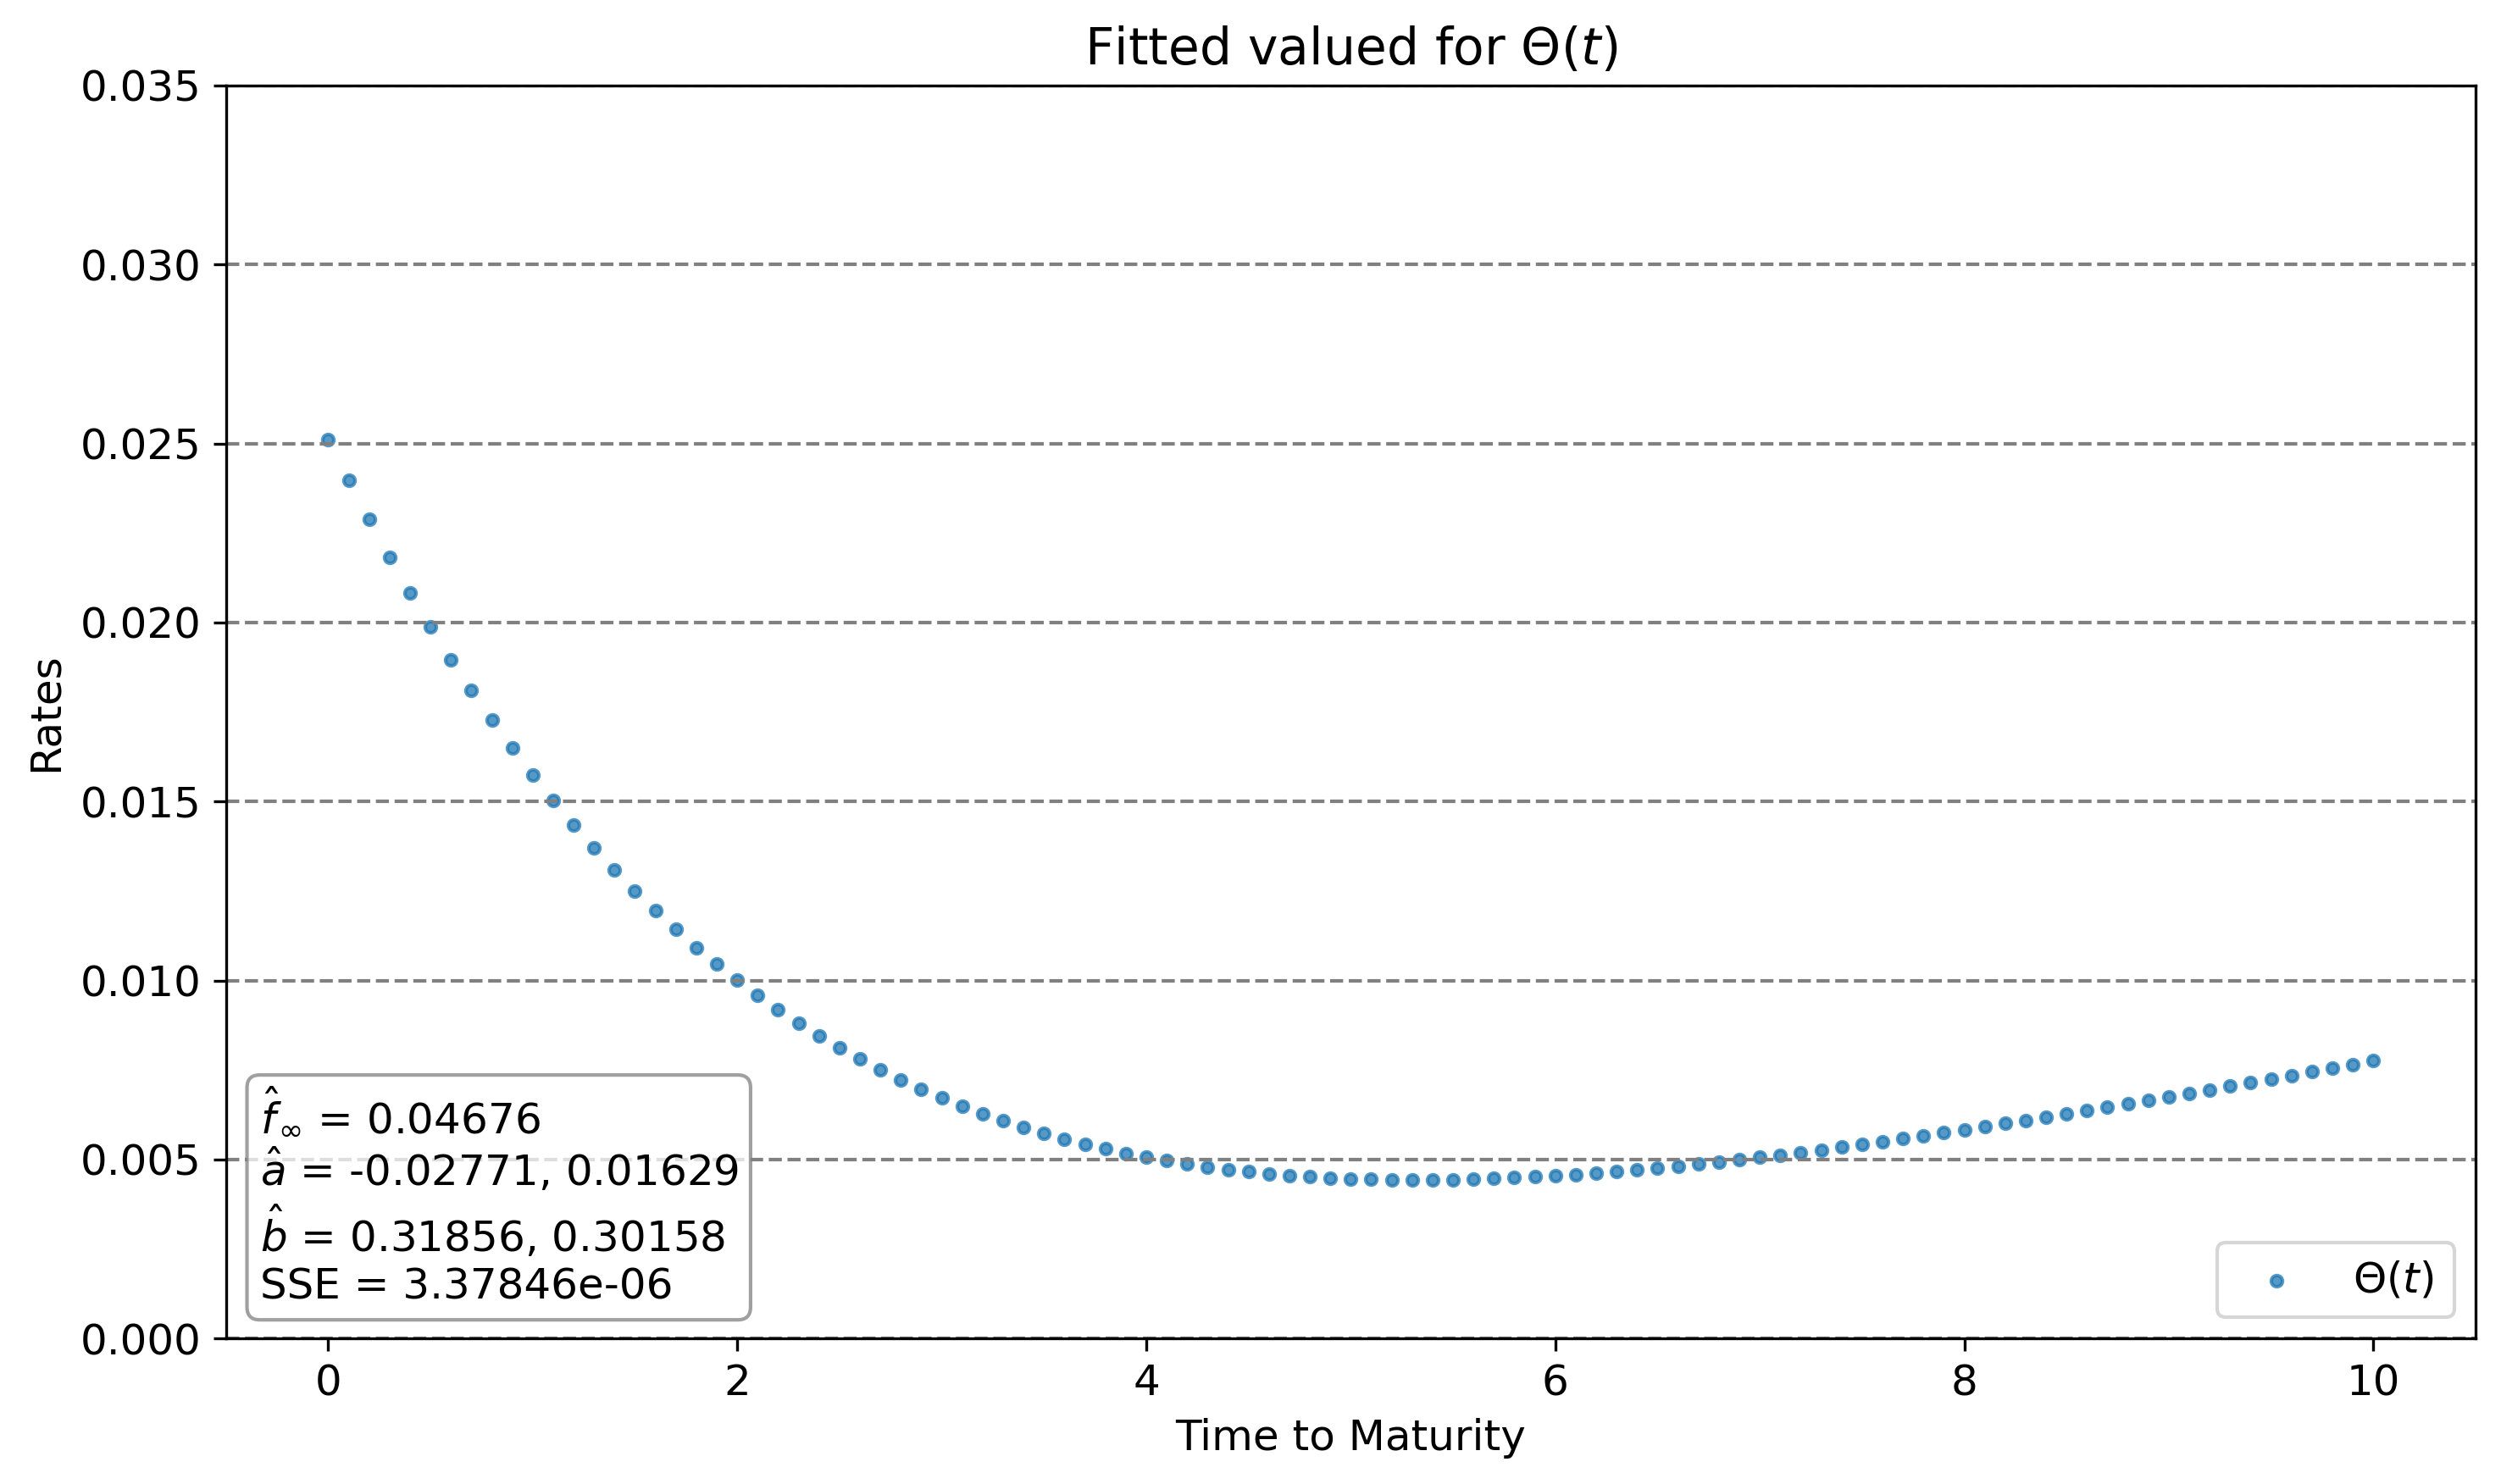

In [15]:
left_axis = [{'label':'$\Theta(t)$','x':T, 'y':theta_2d,'s':40}]
text = {'$\hat f_\infty$':param_2d[0], '$\hat a$':param_2d[1], '$\hat b$':param_2d[2], 'SSE':f'{sse2:.5e}'}

plot.rates(left_axis, title='Fitted valued for $\Theta(t)$', text=text)

#### (e) Now try to fit the function $f(T)$ using the method `Newton-CG`. To do this, you will need to supply the algorithm with a function that returns the Jacobian (a vector of first-order derivatives of the objective function wrt. the parameters) and the Hessian (a matrix of second-order derivatives of the objective function wrt. the parameters). For example, the derivative of your objective function with respect to $a_0$ will be $$ -2\cdot \sum_{m=0}^M (f^*(T_m-f(f_\infty, a,b;T_m)) \cdot \frac{\partial f}{\partial a_0} $$ Report the parameter estimates you find using this method and plot the both the empirical and fitted values

In [16]:
def forward_obj_ns_jac(params, f_star, T): # nelson siegel, minimizing jacobian
    N = int((len(params)-1)/2-1)
    f_inf, a, b = params[0], params[1:1+N+1], params[N+2:N+2+N+1]
    param_fit = f_inf, a, b
    M = len(T)
    f_fit = fid.f_ns(param_fit, T)
    jac = np.zeros(len(params))
    for i in range(M):
        jac += (f_fit[i] - f_star[i])*fid.f_ns_jac(param_fit, T[i])
    return jac

def forward_obj_ns_hess(params, f_star, T): # nelson siegel, minimizing hessian
    N = int((len(params)-1)/2-1)
    f_inf, a, b = params[0], params[1:1+N+1], params[N+2:N+2+N+1]
    param_fit = f_inf, a, b
    M = len(T)
    f_fit = fid.f_ns(param_fit, T)
    hess = np.zeros([len(params), len(params)])
    for i in range(M):
        f_deriv = fid.f_ns_jac(param_fit, T[i])
        hess += (f_fit[i] - f_star[i])*fid.f_ns_hess(param_fit, T[i]) + 2*np.outer(f_deriv, f_deriv)
    return hess

In [17]:
# for K=3
# initial guess
f_inf_0 = (0.03,)
a_0 = -0.05,0.03,0.001 # must be in form of tuple/list/array
b_0 = 0.35,0.35,1 # must be in form of tuple/list/array
param_0 = f_inf_0 + a_0 + b_0 # must be in form of tuple/list/array

K = len(a_0)-1

# unconstrained optimization
result_NCG = minimize(forward_obj_ns, 
                      param_0, 
                      method='Newton-CG', 
                      args=(f_star, T), 
                      jac=forward_obj_ns_jac, 
                      hess=forward_obj_ns_hess, 
                      options={'maxiter':100000,'xtol':1e-12,'disp': False}) # using his options (does make a difference)
f_inf_hat_NCG, a_hat_NCG, b_hat_NCG, sse_NCG = result_NCG.x[0], result_NCG.x[1:1+K+1], result_NCG.x[K+2:K+2+K+1], result_NCG.fun
print(f'results:\n',
      f'f_inf: {f_inf_hat_NCG}\n',
      f'a: {a_hat_NCG}\n',
      f'b: {b_hat_NCG}')
f_fit_NCG = fid.f_ns((f_inf_hat_NCG, a_hat_NCG, b_hat_NCG), T)
res_NCG = f_star - f_fit_NCG

results:
 f_inf: 0.04310380416159192
 a: [-0.0230785   0.01221018  0.00515612]
 b: [0.32716966 0.23847308 0.84225606]


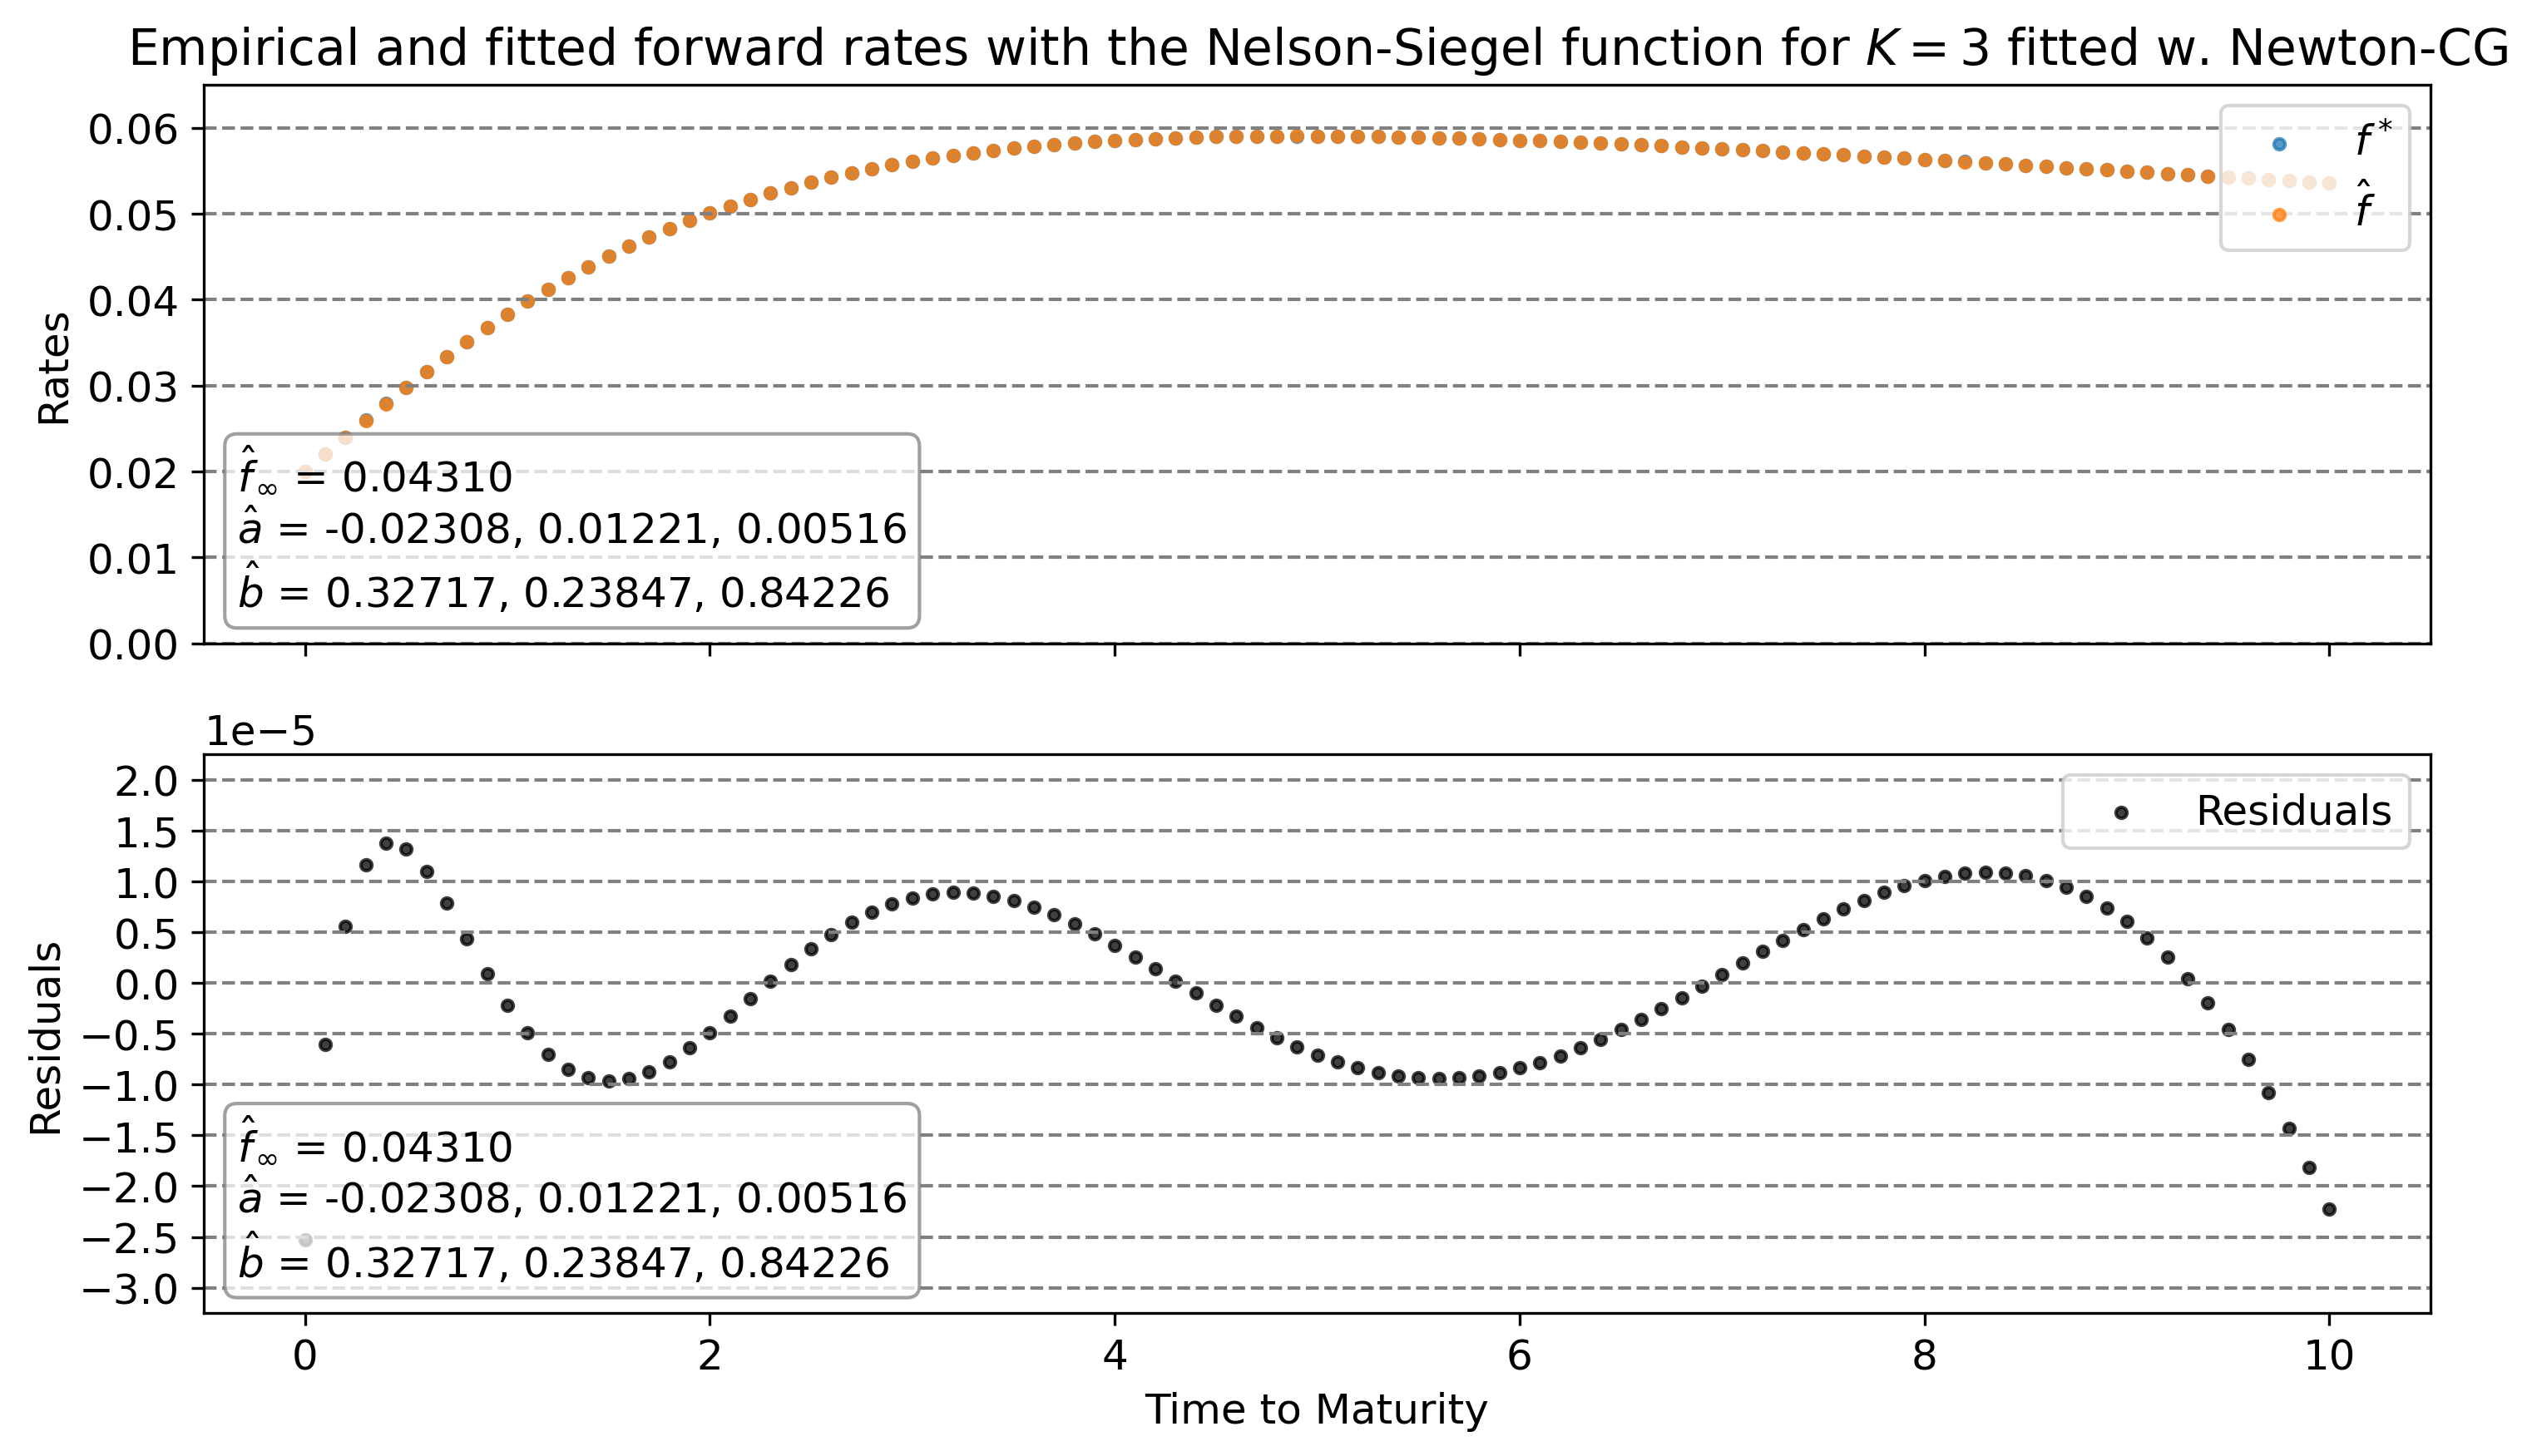

In [18]:
fit_data = [{'label':'$f^*$','x':T, 'y':f_star,'s':40},
            {'label':'$\hat{f}$','x':T, 'y':f_fit_NCG,'s':40}]
residuals = [{'label':'Residuals','x':T, 'y':res_NCG,'s':40}]
text = {'$\hat f_\infty$':f_inf_hat_NCG, '$\hat a$':a_hat_NCG, '$\hat b$':b_hat_NCG}
text_res = {'SSE':sse_NCG}

plot.fit(fit_data, residuals, f'Empirical and fitted forward rates with the Nelson-Siegel function for $K = {K+1}$ fitted w. Newton-CG', text, text_res, text_loc='lower left')

In [19]:
param_2e = (f_inf_hat_NCG, a_hat_NCG, b_hat_NCG, sigma)
theta_2e = fid.theta_ho_lee(T,param_2e, method = 'nelson_siegel')

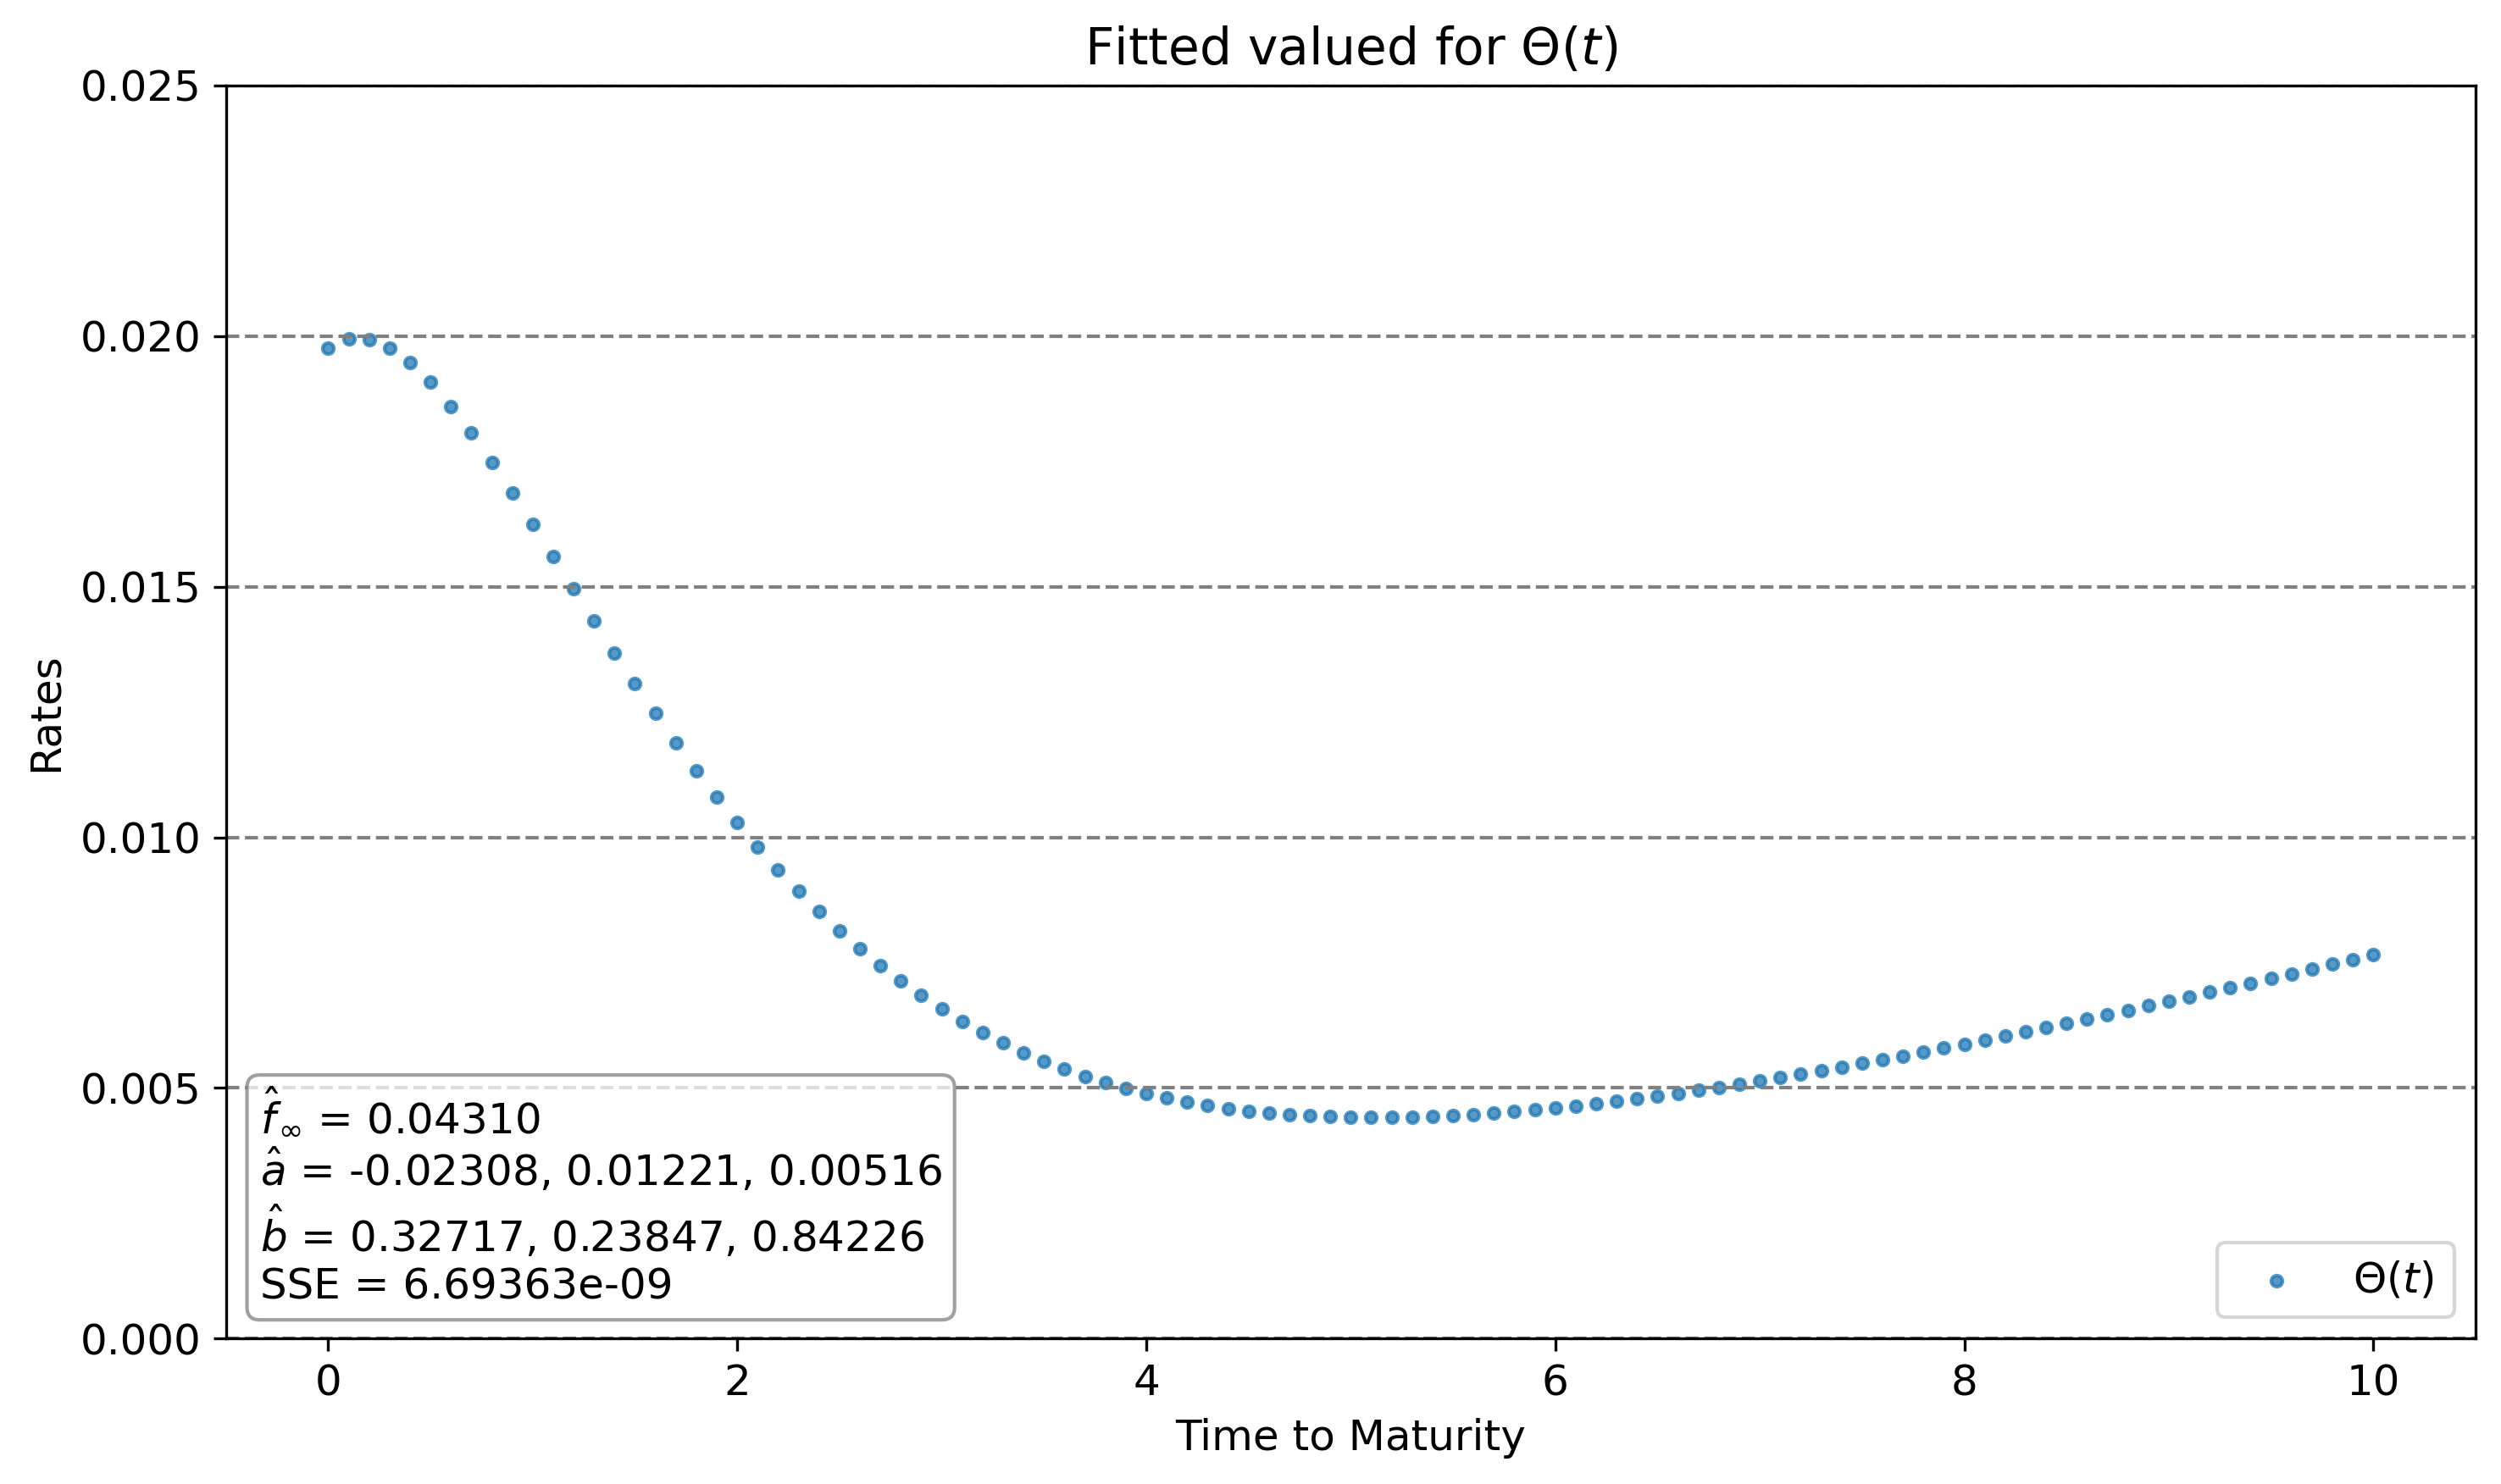

In [20]:
left_axis = [{'label':'$\Theta(t)$','x':T, 'y':theta_2e,'s':40}]
text = {'$\hat f_\infty$':param_2e[0], '$\hat a$':param_2e[1], '$\hat b$':param_2e[2], 'SSE':f'{sse_NCG:.5e}'}

plot.rates(left_axis, title='Fitted valued for $\Theta(t)$', text=text)

---
# Problem 3

Now that we have fitted the Ho-lee model to observed zero coupon bond prices and found the corresponding $\Theta(t)$, we can proceed to use the fitted values to price a complicated derivatives. We will consider two different derivatives and in both cases find a fair value of the derivative at initial time $t = 0$ by simulating the short rate. For each trajectory of simulated values of the short rate, compute the discounted value of the derivative at maturity and repeat the simulation sufficiently many times so that the value of the derivative has converged. When simulating the short rate use the Nelson-Siegel function and the estimated parameters from the best fit you obtained in Problem 1 with $\sigma = 0.03$. Denote by $M$, the number of steps in your simulation and index the time points in your simulation by $m = 0,1,2,...,M −1,M$, the time
points will then be denoted $[t_0,t_1,...,t_{M−1},t_M] = [0,\delta,2\delta,...,(m −1)\delta,T = M\delta]$ and $\delta = \frac{T}{M}$. The scheme you will need to implement is a simple Euler first-order scheme of the form

\begin{align*}
r_m = r_{m-1} + \Theta(t_{m-1})\delta + \sigma \sqrt{\delta} Z_m, \qquad m = 1,2,...,M
\end{align*}

Where $Z_m \sim N(0,1)$, $m=1,...,M$ and all the standard normal random variables are independent.

#### (a) Using what we know about the relationship between the short rate and forward rates, find a good starting value $r_0$ for your simulation in terms of the parameters $f_\infty$, $a$ and $b$

In [21]:
# using the results from the Newton-CG optimization
f_inf3 = f_inf_hat_NCG
a3 = a_hat_NCG
b3 = b_hat_NCG
sigma3 = sigma

In [22]:
r0 = f_inf3 + a3[0]

print(f'Starting value for r0: {r0:.8f}')

Starting value for r0: 0.02002530


First we consider an Asian-style derivative which at maturity $T = 2$ pays the average short rate over the period from $t = 0$ to $T = 2$ provided the average short rate is positive. The contract function for this option is in other words 
\begin{align*}
\chi(T) = \frac{1}{T} \max{(\int_0^T r_u du,0)} = \frac{1}{T} (\int_0^T r_u du)_+
\end{align*}
and the time $t = 0$ value $\Pi$ of the Asian-style derivative can be expressed as
\begin{align*}
\Pi = \mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^T r_u du} \chi(T)\vert \mathcal{F}_0\right]
\end{align*}

#### (b) Run the simulation $N$ times where you can start by setting $N$ to something small, say $N = 10$. For each trajectory denoted by $n$, collect the discounted value of $\chi_n(T)$ in a vector of length $N$ and use these values to find an estimate for $\Pi$ as a function of the number of simulations.

In [23]:
M3b, N3b, T3b = 10, 10, 2
chi_disc3b, price3b = np.zeros([N3b]), np.zeros([N3b])
delta3b = T3b/M3b
t_simul = np.array([i*delta3b for i in range(M3b+1)])
f_T3b = fid.f_ns_T((a3, b3), t_simul)
np.random.seed(2024)
for n in range(N3b):
    r = fid.simul_ho_lee(r0, f_T3b, sigma3, T3b, method='euler')
    chi_disc3b[n] = np.exp(-sum(r[:])*delta3b)*max(sum(r[:])/(M3b+1), 0)
    price3b[n] = sum(chi_disc3b[0:n+1]/(n+1))
pi_3b = price3b[-1]
print(f'Price of the Asian derivative: {pi_3b:.8f}')

Price of the Asian derivative: 0.03174895


#### (c) Now run the above scheme for large values of $M$ and $N$ and plot the value of the derivative as a function of the number of simulations. Assess how many simulations are for the scheme to have converged as a function of $N$. Does the fact that the simulation has converged implies that the price of the derivative is accurate?

In [24]:
M3c, N3c, T3c = 2000, 2000, 2
chi_disc3c, price3c = np.zeros([N3c]), np.zeros([N3c])
delta3c = T3c/M3c
t_simul = np.array([i*delta3c for i in range(M3c+1)])
f_T3c = fid.f_ns_T((a3, b3), t_simul)
np.random.seed(2024)
for n in range(N3c):
    r = fid.simul_ho_lee(r0, f_T3c, sigma3, T3c, method='euler')
    chi_disc3c[n] = np.exp(-sum(r[:])*delta3c)*max(sum(r[:])/(M3c+1), 0)
    price3c[n] = sum(chi_disc3c[0:n+1]/(n+1))
pi_3c = price3c[-1]
print(f'Price of the Asian derivative: {pi_3c:.8f}')

Price of the Asian derivative: 0.03389028


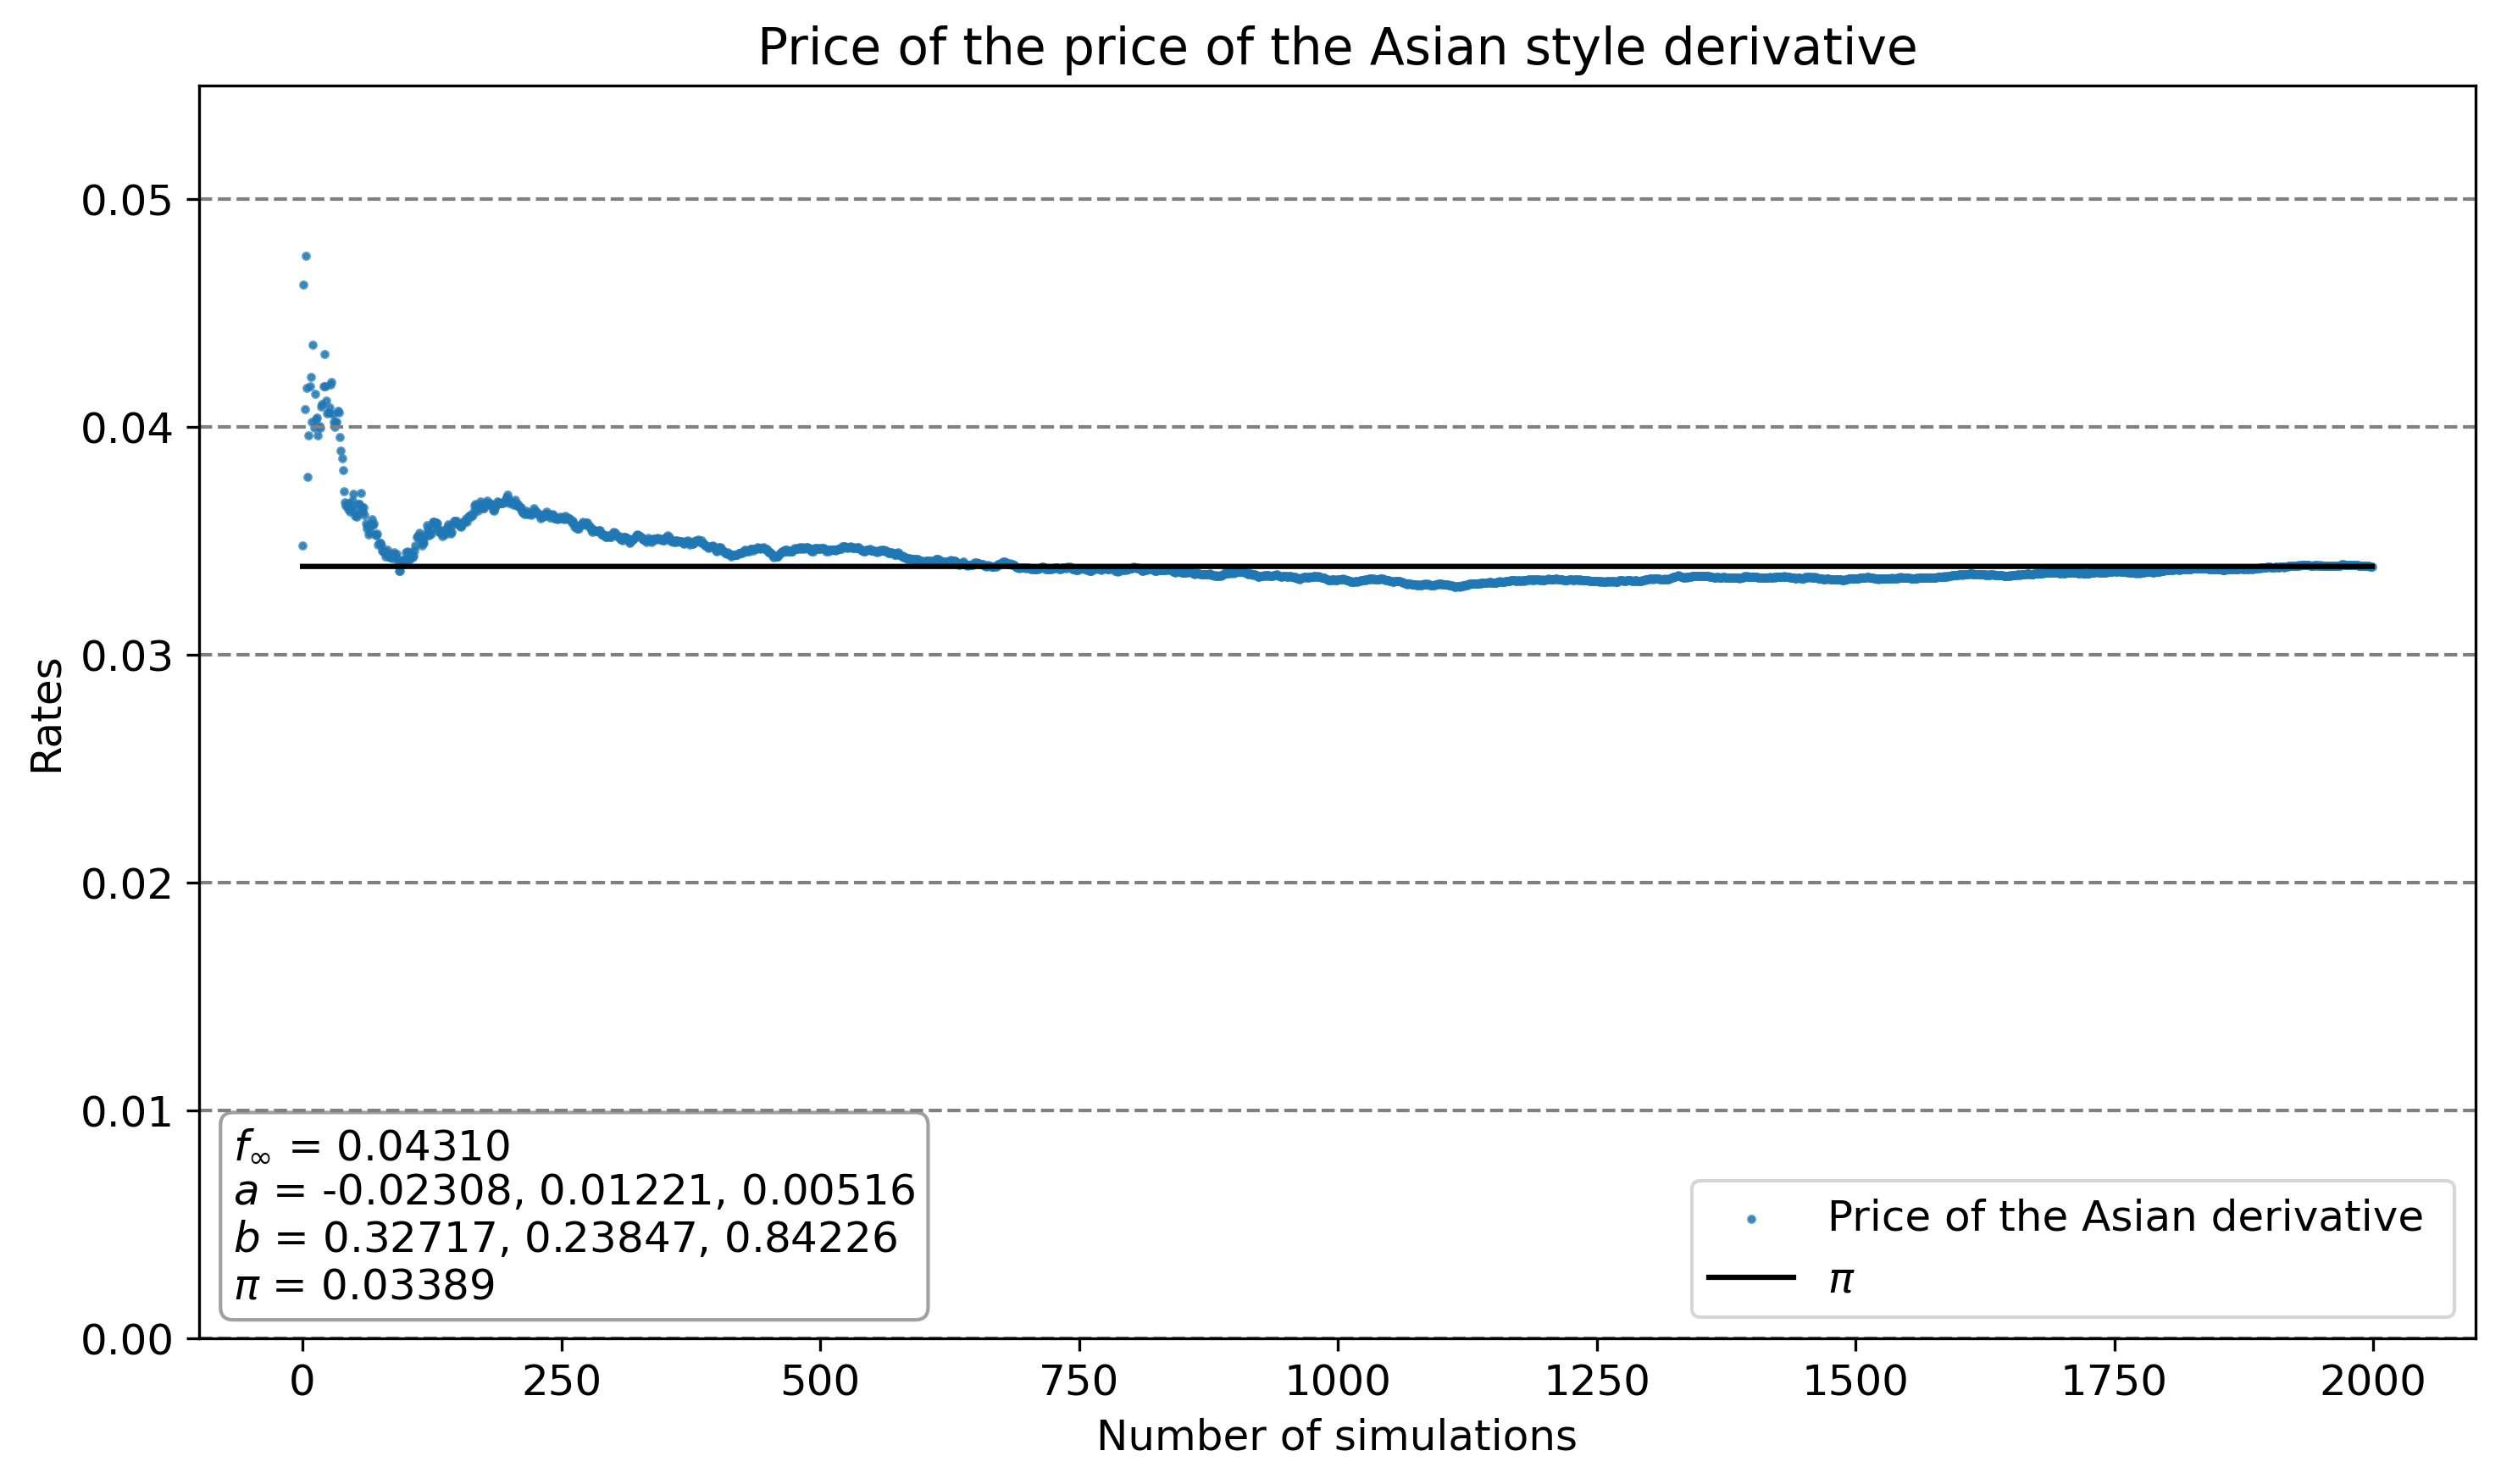

In [25]:
left_axis = [{'label':'Price of the Asian derivative','x':[n for n in range(N3c)], 'y':price3c},
             {'label':'$\pi$','x':[n for n in range(N3c)], 'y':pi_3c*np.ones([N3c]),'s':3,'type':'line','color':'black'}]
text = {'$f_\infty$':f_inf3, '$a$':a3, '$b$':b3, '$\pi$':pi_3c}

plot.rates(left_axis, title='Price of the price of the Asian style derivative', text=text,xlabel='Number of simulations')

We can lock in a average short rate of 3.2% over the next two years

Second, we consider a 1Y4Y payer swaption which at time of exercise $T$ gives the owner of the swaption the right to enter into a 4Y payer swap at a strike of $K = 0.04$.

#### (d) Find an expression for the payoff at time of exercise and an expression for the time $t = 0$ price of the 1Y4Y payer swaption. These expressions will depend on ZCB prices $p(t,T)$ in the Ho-Lee model when the model has been fitted to forward rates at time $t = 0$ as was done in problem 2.

In [26]:
M3d, N3d, T3d = 100, 10, 1
strike = 0.04
chi_disc3d, price3d, R_swap = np.zeros([N3d]), np.zeros([N3d]), np.zeros([N3d])
T_swap = np.array([2,3,4,5])
T_star = np.array([1,2,3,4,5])
f_star3d = fid.f_ns((f_inf3, a3, b3), T3d)
p_star = np.exp(-fid.F_ns((f_inf3, a3, b3), T_star)) # why is this not T3d?
p_fixed_help = fid.zcb_price_ho_lee(T3d, T_swap,0,sigma3,T_star,p_star,f_star3d)
f_T = fid.f_ns_T((a3, b3), t_simul)

np.random.seed(2024)
for n in range(N3d):
    r = fid.simul_ho_lee(r0, f_T, sigma3, T3d, method='euler')
    p_fixed = np.exp(r[-1]*T3d)*np.exp(-T_swap*r[-1])*p_fixed_help
    S = sum(p_fixed)
    R_swap[n] = (1-p_fixed[-1])/S
    chi_disc3d[n] = np.exp(-sum(r[:])*(T3d/M3d))*max((R_swap[n]-strike)*S, 0)
    price3d[n] = sum(chi_disc3d[0:n+1]/(n+1))
pi_3d = sum(chi_disc3d)/N3d
print(f'Price of the 1Y4Y payer swaption: {pi_3d:.8f}') # very far off from the res

Price of the 1Y4Y payer swaption: 0.03486415


#### (e) Run the simulation for a reasonably large $M$ and $N$ and plot the price of the 1Y4Y swaption as a function of the number of simulations and be sure to choose a sufficiently large $N$ to insure that the scheme has converged as a function of $N$. Assess if the value of your swaption is accurate. Could you have computed the value of the swaption using the explicit formula for option prices that are available for the Ho-Lee model?

In [27]:
M3e, N3e, T3e = 1000, 5000, 1
strike = 0.04
chi_disc3e, price3e, R_swap = np.zeros([N3e]), np.zeros([N3e]), np.zeros([N3e])
T_swap = np.array([2,3,4,5])
T_star = np.array([1,2,3,4,5])
f_star3e = fid.f_ns((f_inf3, a3, b3), T3e)
p_star = np.exp(-fid.F_ns((f_inf3, a3, b3), T_star)) # why is this not T3e?
p_fixed_help = fid.zcb_price_ho_lee(T3e, T_swap,0,sigma3,T_star,p_star,f_star3e)
f_T = fid.f_ns_T((a3, b3), t_simul)

np.random.seed(2024)
for n in range(N3e):
    r = fid.simul_ho_lee(r0, f_T, sigma3, T3e, method='euler')
    p_fixed = np.exp(r[-1]*T3e)*np.exp(-T_swap*r[-1])*p_fixed_help
    S = sum(p_fixed)
    R_swap[n] = (1-p_fixed[-1])/S
    chi_disc3e[n] = np.exp(-sum(r[:])*(T3e/M3e))*max((R_swap[n]-strike)*S, 0)
    price3e[n] = sum(chi_disc3e[0:n+1]/(n+1))
pi_3e = sum(chi_disc3e)/N3e
print(f'Price of the 1Y4Y payer swaption: {pi_3e:.8f}')

Price of the 1Y4Y payer swaption: 0.05846215


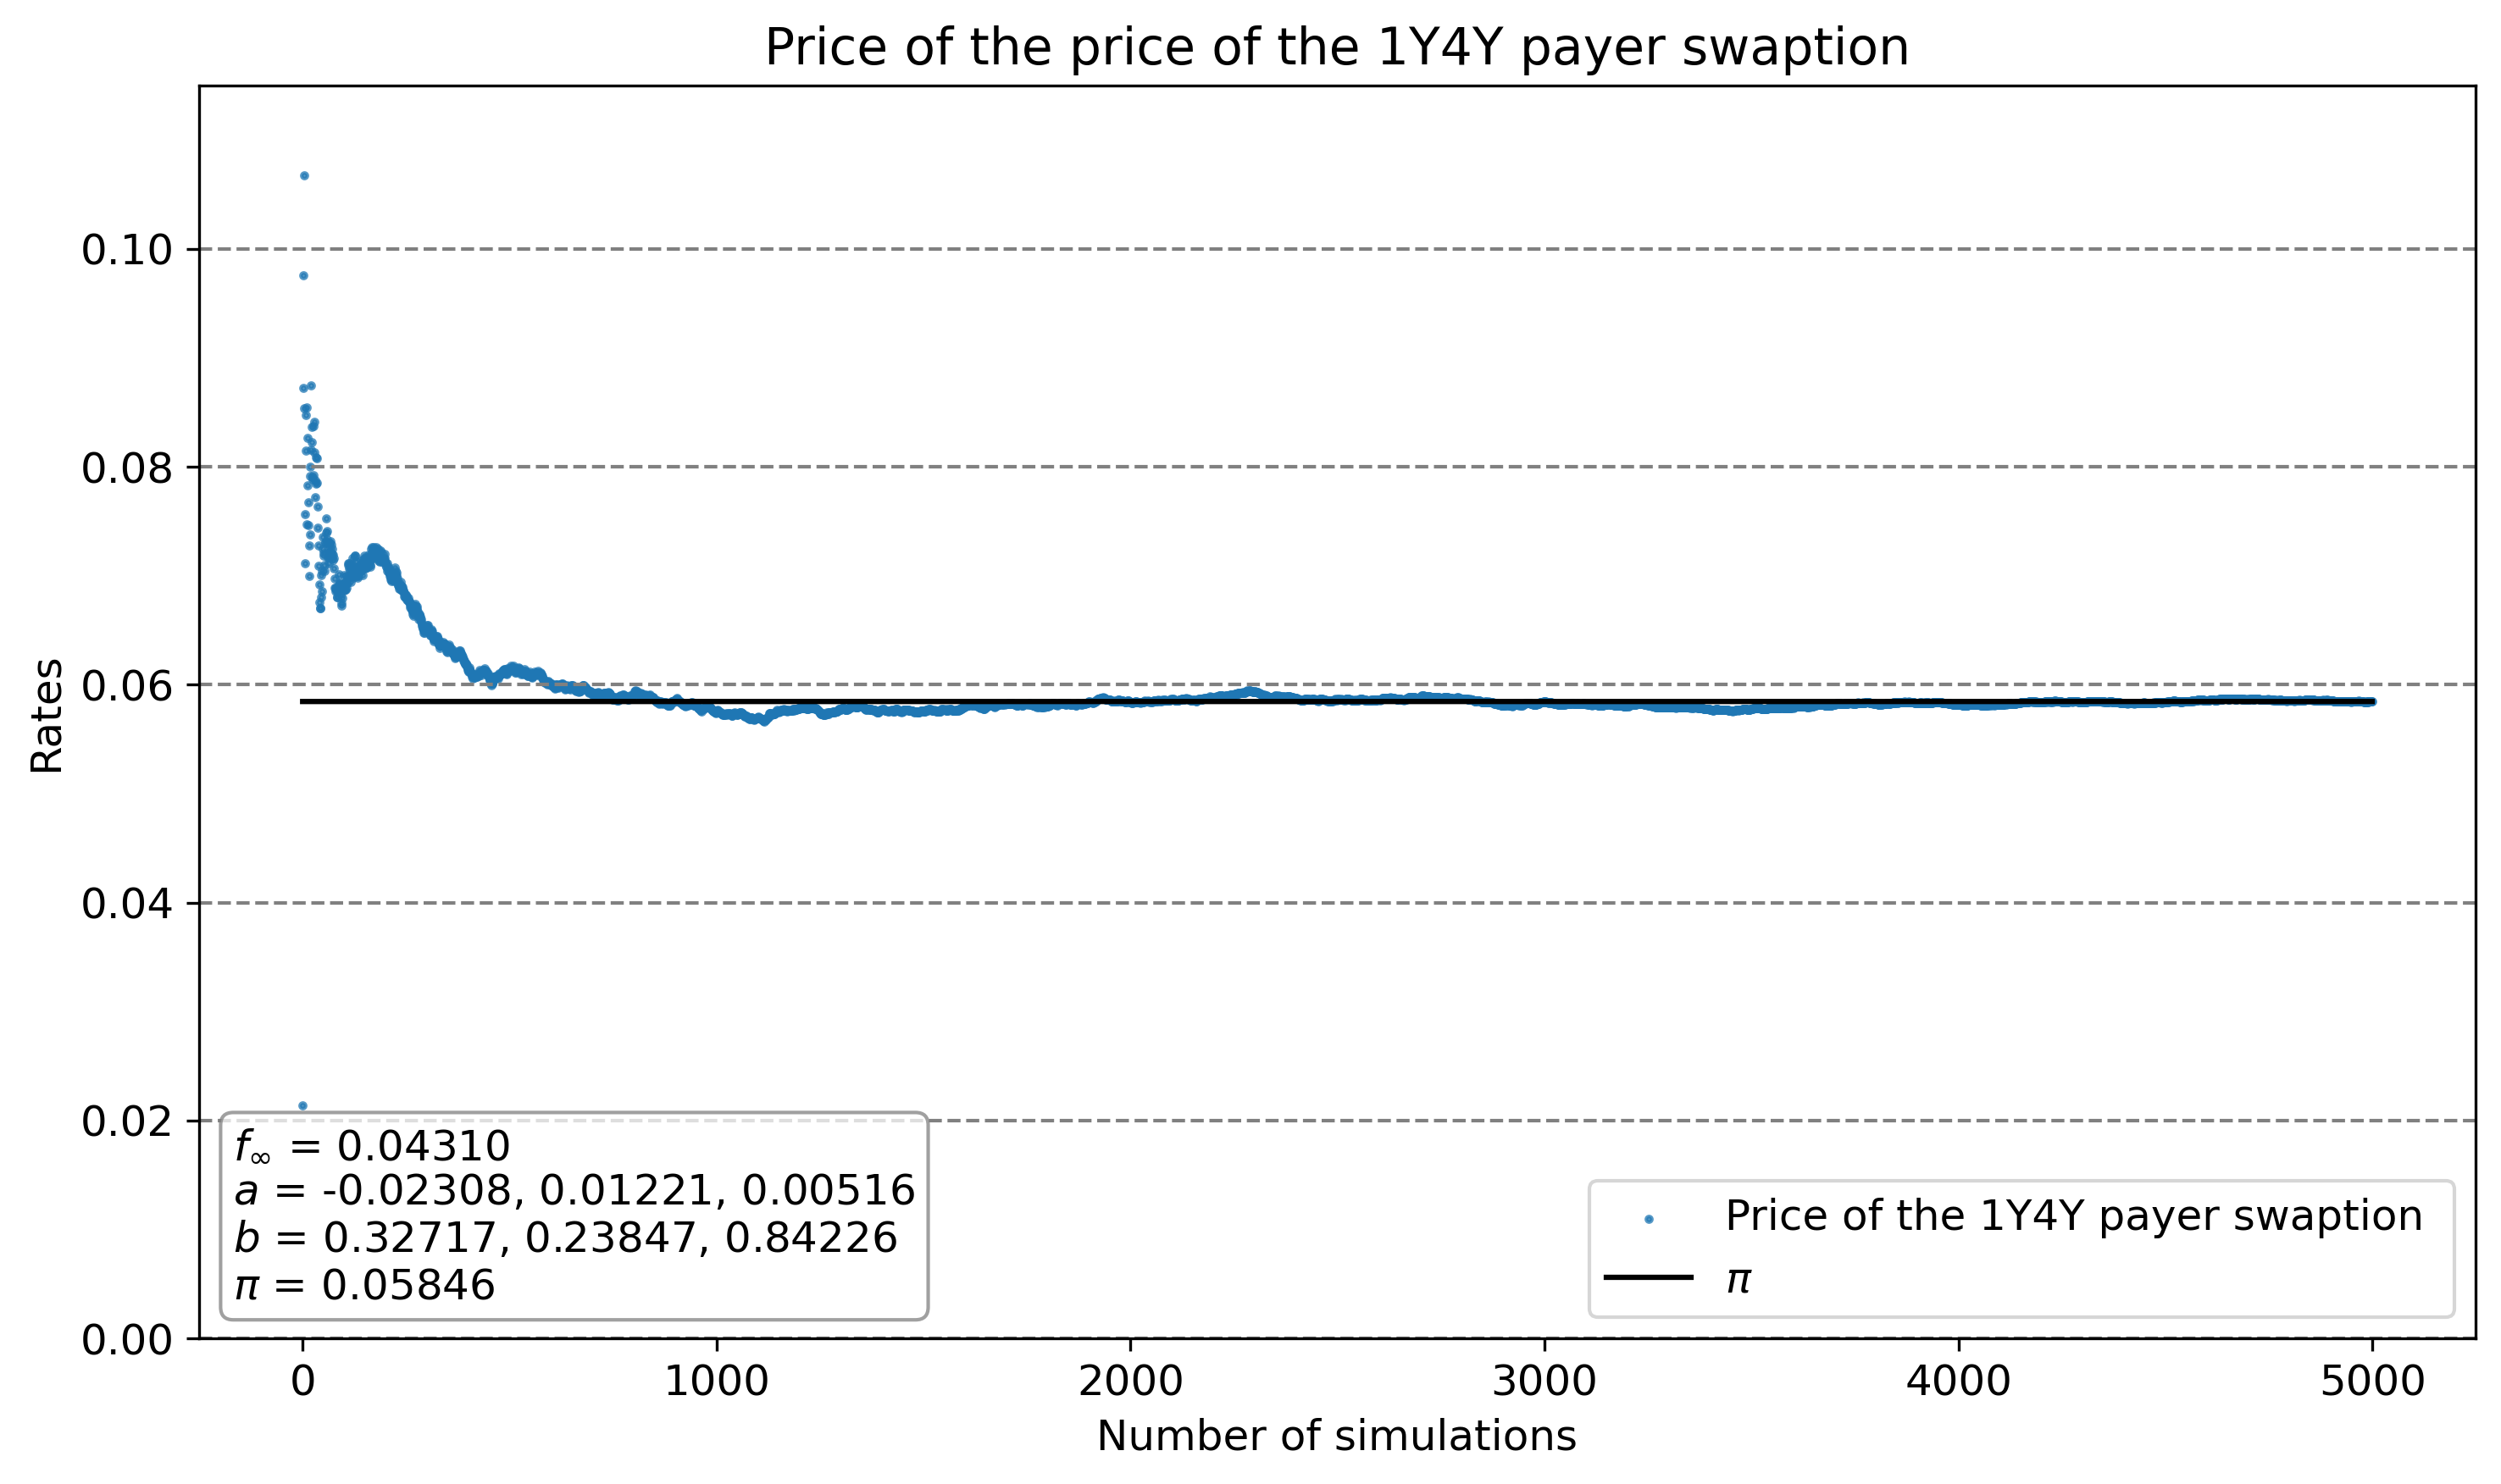

In [28]:
left_axis = [{'label':'Price of the 1Y4Y payer swaption','x':[n for n in range(N3e)], 'y':price3e},
             {'label':'$\pi$','x':[n for n in range(N3e)], 'y':pi_3e*np.ones([N3e]),'s':3,'type':'line','color':'black'}]
text = {'$f_\infty$':f_inf3, '$a$':a3, '$b$':b3, '$\pi$':pi_3e}

plot.rates(left_axis, title='Price of the price of the 1Y4Y payer swaption', text=text,xlabel='Number of simulations')